# Visualization of Perturbations

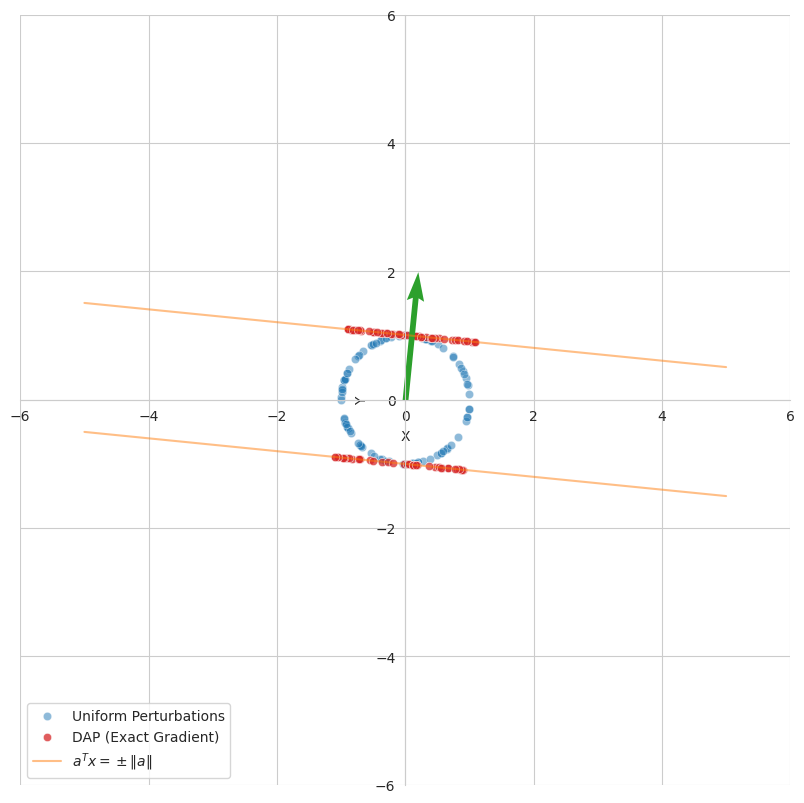

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

def proj(x, a):
    n = len(a)
    a_norm_square = np.dot(a, a)
    ratio = a.dot(x) / a_norm_square
    drift = a / np.sqrt(a_norm_square)
    xi = np.random.choice([-1, 1])
    return x - ratio*a + xi * drift

# Set the style and color palette
sns.set_style("whitegrid")
sns.set_palette("tab10")

# Generate data
# a = np.array([-0.00241952, 1.95598871])
a = np.array([0.2, 2.0])
points = np.random.normal(size=(100, 2))
points = points / np.linalg.norm(points, axis=1)[:, np.newaxis]
projected_points = np.array([proj(x, a) for x in points])

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot original points
sns.scatterplot(x=points[:, 0], y=points[:, 1], label='Uniform Perturbations', alpha=0.5, ax=ax, color=sns.color_palette()[0])

# Plot projected points
sns.scatterplot(x=projected_points[:, 0], y=projected_points[:, 1], label='DAP (Exact Gradient)', alpha=0.75, ax=ax, color=sns.color_palette()[3])

# Plot the lines a^T x = ±sqrt(a^T a)
x_vals = np.linspace(-5, 5, 400)
y_vals_pos = (np.sqrt(np.dot(a, a)) - a[0] * x_vals) / a[1]
y_vals_neg = (-np.sqrt(np.dot(a, a)) - a[0] * x_vals) / a[1]
ax.plot(x_vals, y_vals_pos, label='$a^T x = \\pm \|a\|$', alpha=0.5, color=sns.color_palette()[1])
ax.plot(x_vals, y_vals_neg, alpha=0.5, color=sns.color_palette()[1])

# Plot the vector a from the origin
ax.quiver(0, 0, a[0], a[1], angles='xy', scale_units='xy', scale=1.0, color=sns.color_palette()[2])

# Customize the plot
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])
ax.set_aspect('equal')

# Add legend
ax.legend(loc='lower left')

# Set title
# plt.title('DAP Projection Visualization', fontsize=16)

# Save and show the plot
plt.savefig('seaborn_dap_plot.png', dpi=300, bbox_inches='tight')
plt.show()

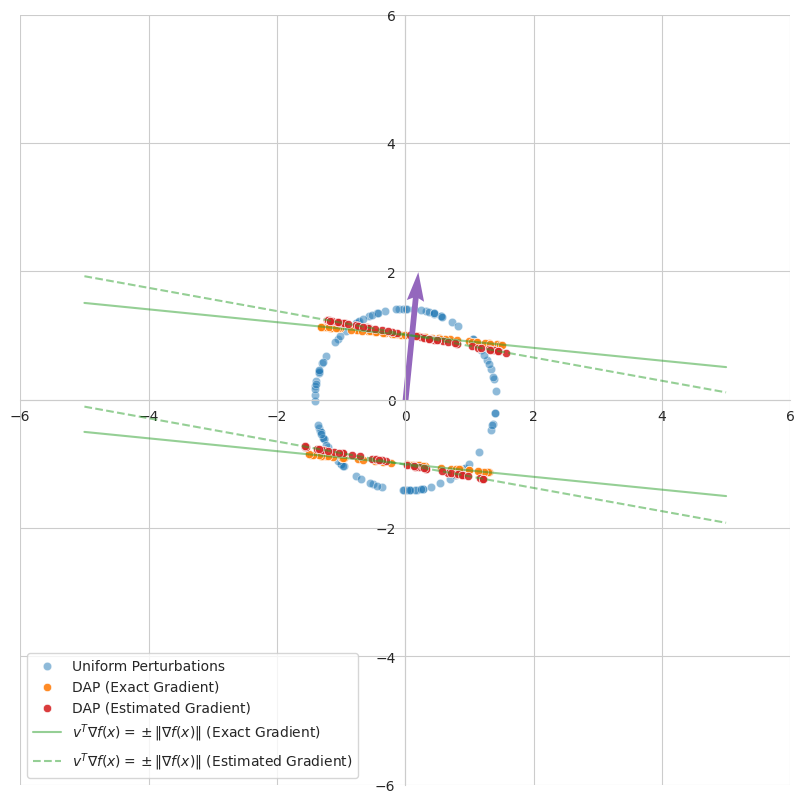

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

def proj(x, a):
    n = len(a)
    a_norm_square = np.dot(a, a)
    ratio = a.dot(x) / a_norm_square
    drift = a / np.sqrt(a_norm_square)
    xi = np.random.choice([-1, 1])
    return x - ratio*a + xi * drift

# Set the style and color palette
sns.set_style("whitegrid")
sns.set_palette("tab10")

# Generate data
a1 = np.array([0.2, 2.0])
# a2 = np.array([-0.00241952, 1.95598871])
a2 = np.array([0.34810399, 1.92316471])

points = np.random.normal(size=(100, 2))
points = points / np.linalg.norm(points, axis=1)[:, np.newaxis] * np.sqrt(2)
projected_points1 = np.array([proj(x, a1) for x in points])
projected_points2 = np.array([proj(x, a2) for x in points])

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot original points
sns.scatterplot(x=points[:, 0], y=points[:, 1], label='Uniform Perturbations', alpha=0.5, ax=ax, color=sns.color_palette()[0])

# Plot projected points for a1
sns.scatterplot(x=projected_points1[:, 0], y=projected_points1[:, 1], label='DAP (Exact Gradient)', alpha=0.9, ax=ax, color=sns.color_palette()[1])

# Plot projected points for a2
sns.scatterplot(x=projected_points2[:, 0], y=projected_points2[:, 1], label='DAP (Estimated Gradient)', alpha=0.9, ax=ax, color=sns.color_palette()[3])

# Plot the lines a1^T x = ±sqrt(a1^T a1)
x_vals = np.linspace(-5, 5, 400)
y_vals_pos1 = (np.sqrt(np.dot(a1, a1)) - a1[0] * x_vals) / a1[1]
y_vals_neg1 = (-np.sqrt(np.dot(a1, a1)) - a1[0] * x_vals) / a1[1]
ax.plot(x_vals, y_vals_pos1, label='$v^T \\nabla f(x) = \\pm \|\\nabla f(x)\|$ (Exact Gradient)', alpha=0.5, color=sns.color_palette()[2])
ax.plot(x_vals, y_vals_neg1, alpha=0.5, color=sns.color_palette()[2])

# Plot the lines a2^T x = ±sqrt(a2^T a2)
y_vals_pos2 = (np.sqrt(np.dot(a2, a2)) - a2[0] * x_vals) / a2[1]
y_vals_neg2 = (-np.sqrt(np.dot(a2, a2)) - a2[0] * x_vals) / a2[1]
ax.plot(x_vals, y_vals_pos2, label='$v^T \\nabla f(x) = \\pm \|\\nabla f(x)\|$ (Estimated Gradient)', alpha=0.5, color=sns.color_palette()[2], linestyle='--')
ax.plot(x_vals, y_vals_neg2, alpha=0.5, color=sns.color_palette()[2], linestyle='--')

# Plot the vectors a1 and a2 from the origin
ax.quiver(0, 0, a1[0], a1[1], angles='xy', scale_units='xy', scale=1.0, color=sns.color_palette()[4])
# ax.quiver(0, 0, a2[0], a2[1], angles='xy', scale_units='xy', scale=1.0, color=sns.color_palette()[4], label='a2')

# Customize the plot
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])
ax.set_aspect('equal')

# Add legend
ax.legend(loc='lower left')

# Set title
# plt.title('DAP Projection Visualization with Two Vectors', fontsize=16)

# Save and show the plot
plt.savefig('seaborn_dap_plot_two_vectors.png', dpi=300, bbox_inches='tight')
plt.show()

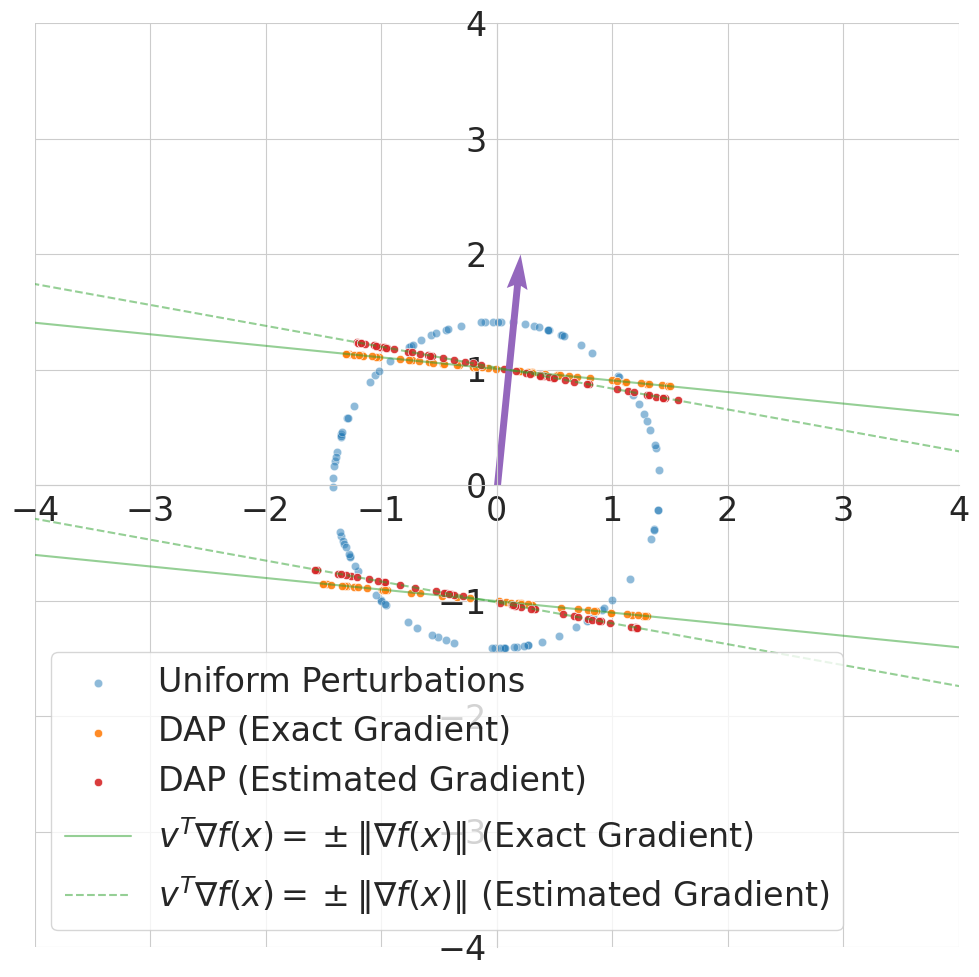

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

def proj(x, a):
    n = len(a)
    a_norm_square = np.dot(a, a)
    ratio = a.dot(x) / a_norm_square
    drift = a / np.sqrt(a_norm_square)
    xi = np.random.choice([-1, 1])
    return x - ratio*a + xi * drift

# Set the style and color palette
sns.set_style("whitegrid")
sns.set_palette("tab10")

# Set the font size for all elements
plt.rcParams['font.size'] = 24
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24

# Generate data
a1 = np.array([0.2, 2.0])
a2 = np.array([0.34810399, 1.92316471])

points = np.random.normal(size=(100, 2))
points = points / np.linalg.norm(points, axis=1)[:, np.newaxis] * np.sqrt(2)
projected_points1 = np.array([proj(x, a1) for x in points])
projected_points2 = np.array([proj(x, a2) for x in points])

# Create the plot
fig, ax = plt.subplots(figsize=(12, 12))  # Increased figure size to accommodate larger font

# Plot original points
sns.scatterplot(x=points[:, 0], y=points[:, 1], label='Uniform Perturbations', alpha=0.5, ax=ax, color=sns.color_palette()[0])

# Plot projected points for a1
sns.scatterplot(x=projected_points1[:, 0], y=projected_points1[:, 1], label='DAP (Exact Gradient)', alpha=0.9, ax=ax, color=sns.color_palette()[1])

# Plot projected points for a2
sns.scatterplot(x=projected_points2[:, 0], y=projected_points2[:, 1], label='DAP (Estimated Gradient)', alpha=0.9, ax=ax, color=sns.color_palette()[3])

# Plot the lines a1^T x = ±sqrt(a1^T a1)
x_vals = np.linspace(-5, 5, 400)
y_vals_pos1 = (np.sqrt(np.dot(a1, a1)) - a1[0] * x_vals) / a1[1]
y_vals_neg1 = (-np.sqrt(np.dot(a1, a1)) - a1[0] * x_vals) / a1[1]
ax.plot(x_vals, y_vals_pos1, label='$v^T \\nabla f(x) = \\pm \|\\nabla f(x)\|$ (Exact Gradient)', alpha=0.5, color=sns.color_palette()[2])
ax.plot(x_vals, y_vals_neg1, alpha=0.5, color=sns.color_palette()[2])

# Plot the lines a2^T x = ±sqrt(a2^T a2)
y_vals_pos2 = (np.sqrt(np.dot(a2, a2)) - a2[0] * x_vals) / a2[1]
y_vals_neg2 = (-np.sqrt(np.dot(a2, a2)) - a2[0] * x_vals) / a2[1]
ax.plot(x_vals, y_vals_pos2, label='$v^T \\nabla f(x) = \\pm \|\\nabla f(x)\|$ (Estimated Gradient)', alpha=0.5, color=sns.color_palette()[2], linestyle='--')
ax.plot(x_vals, y_vals_neg2, alpha=0.5, color=sns.color_palette()[2], linestyle='--')

# Plot the vectors a1 and a2 from the origin
ax.quiver(0, 0, a1[0], a1[1], angles='xy', scale_units='xy', scale=1.0, color=sns.color_palette()[4])

# Customize the plot
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
ax.set_aspect('equal')

# Add legend
ax.legend(loc='lower left', fontsize=24)  # Explicitly set legend font size

# Save and show the plot
plt.savefig('seaborn_dap_plot_two_vectors.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualization of Distribution Pattern over Different Directions

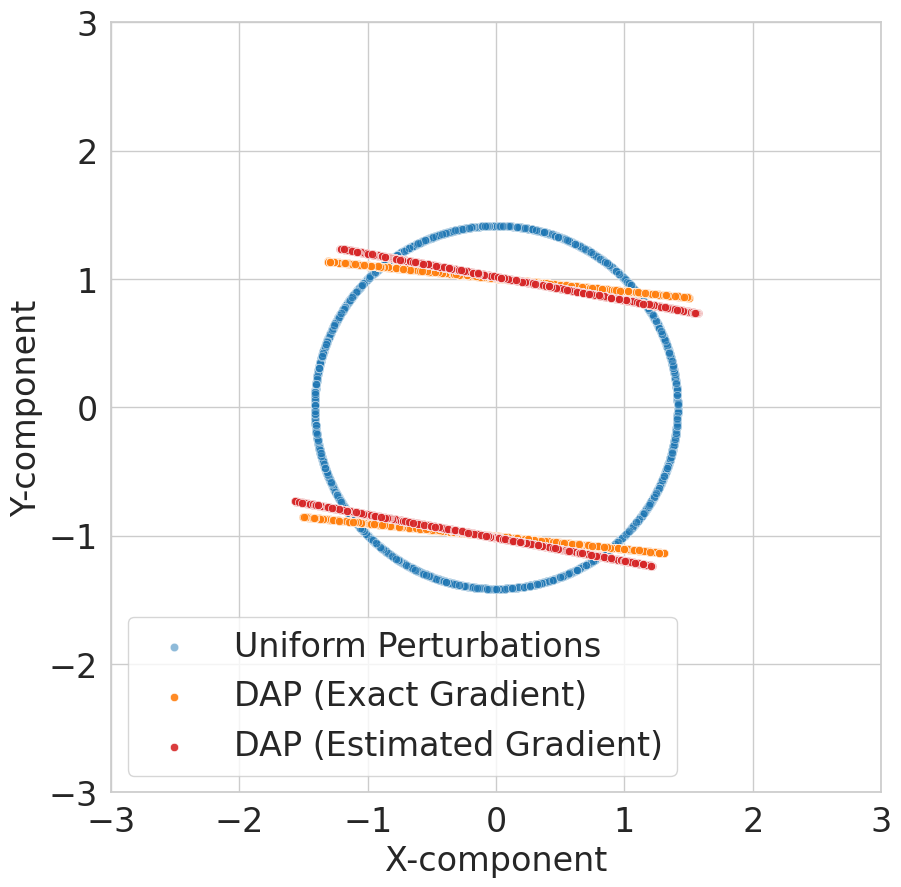

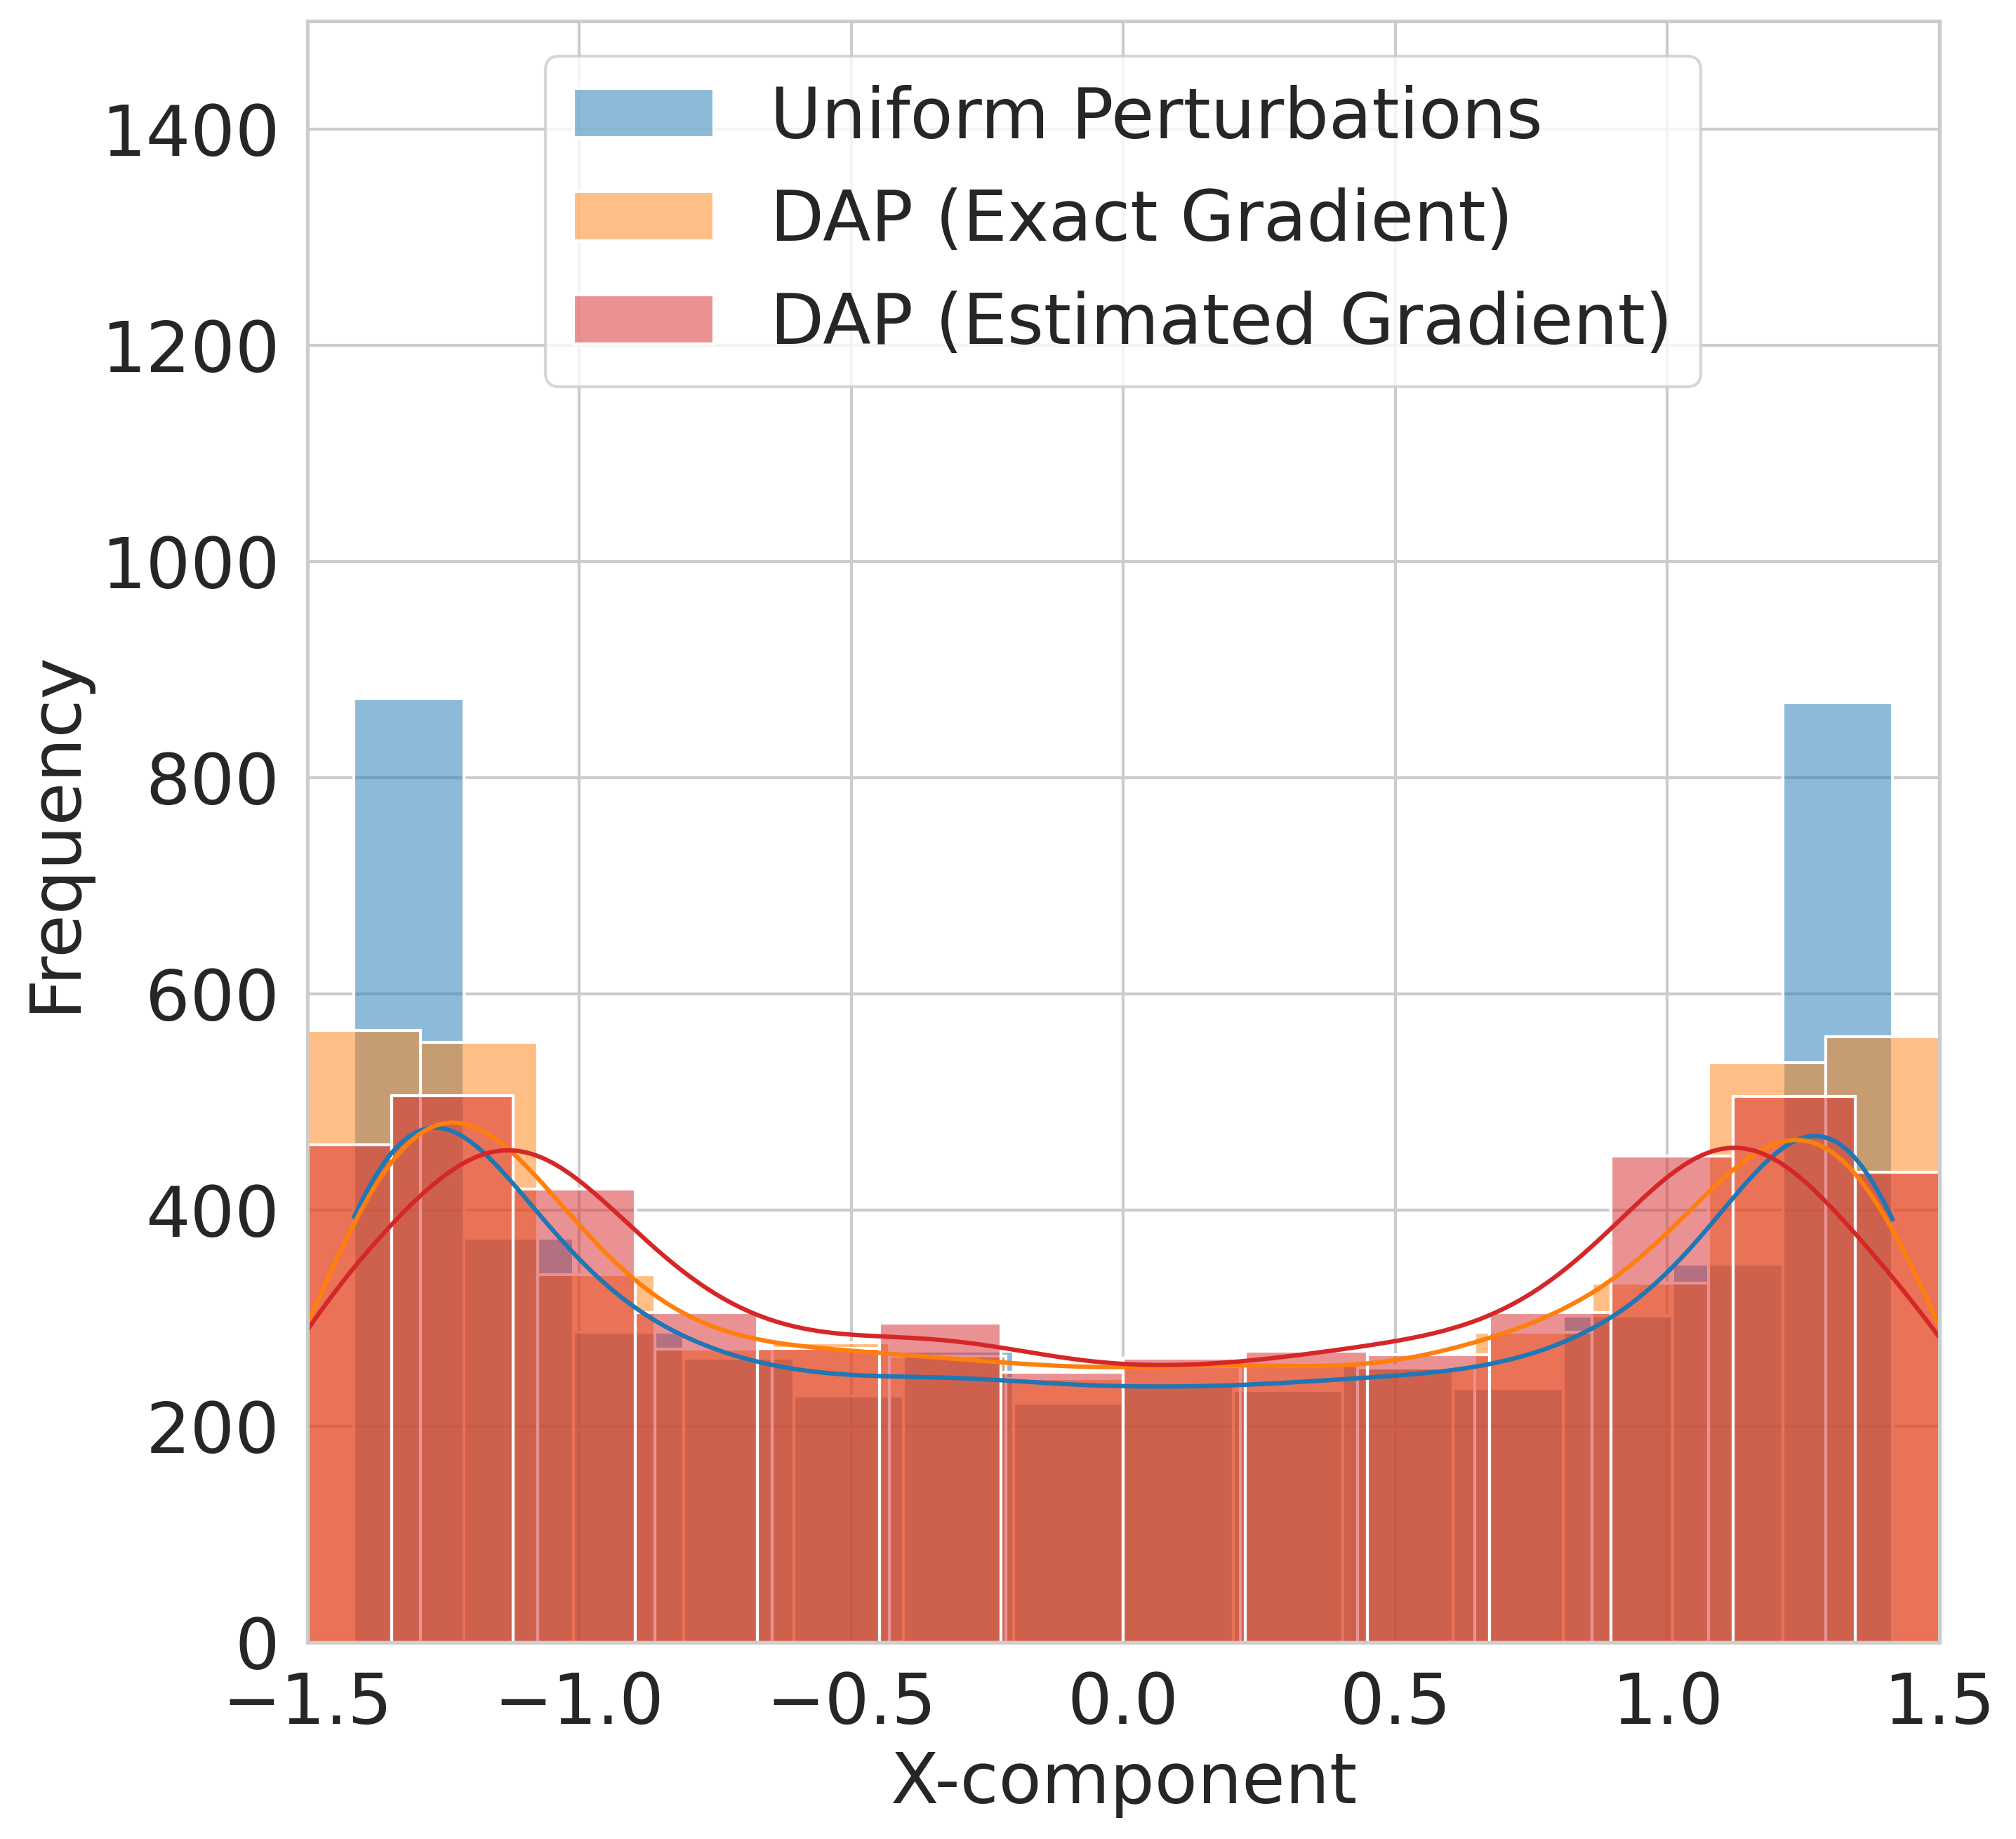

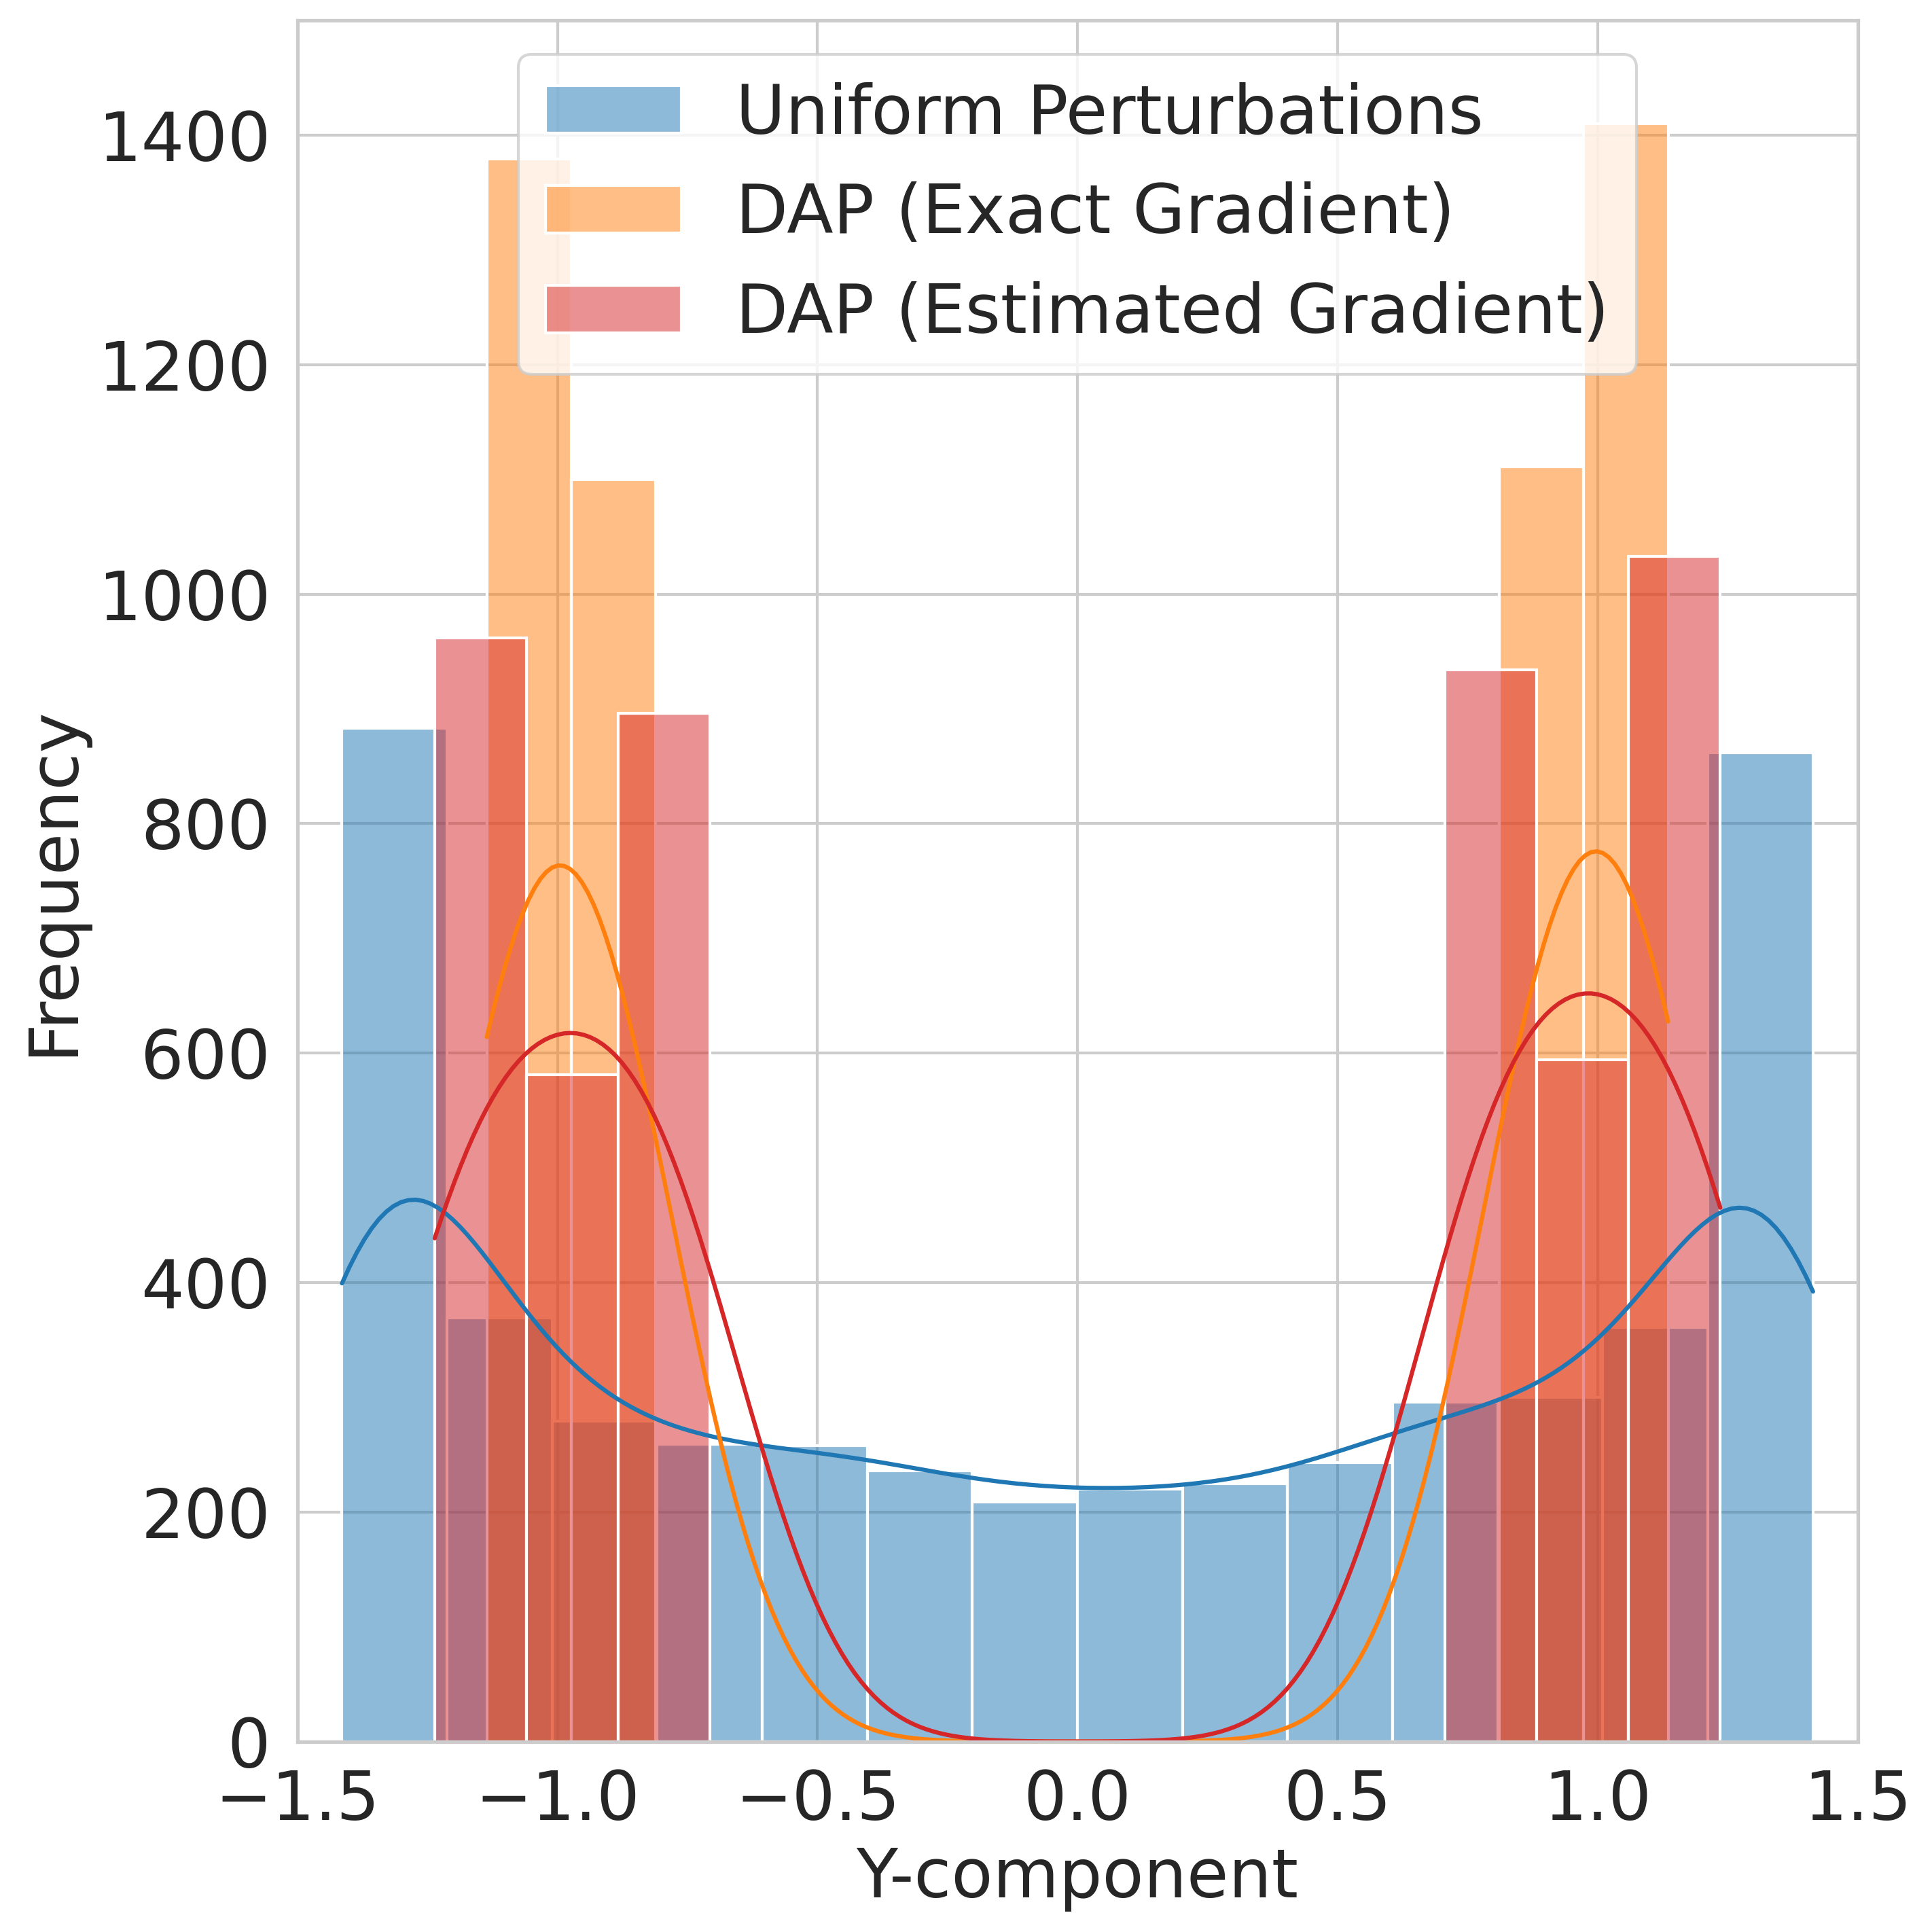

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
width = 10
height = 10
sns.set(rc = {'figure.figsize':(width,height)})

np.random.seed(42)
pixel_width = 3000  # 10 inches * 300 DPI
pixel_height = 3000
def proj(x, a):
    n = len(a)
    a_norm_square = np.dot(a, a)
    ratio = a.dot(x) / a_norm_square
    drift = a / np.sqrt(a_norm_square)
    xi = np.random.choice([-1, 1])
    return x - ratio*a + xi * drift

# Set the style and color palette
sns.set_style("whitegrid")
sns.set_palette("tab10")

# Set the font size for all elements
plt.rcParams['font.size'] = 24
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24

# Generate data
a1 = np.array([0.2, 2.0])
a2 = np.array([0.34810399, 1.92316471])

points = np.random.normal(size=(5000, 2))
points = points / np.linalg.norm(points, axis=1)[:, np.newaxis] * np.sqrt(2)
projected_points1 = np.array([proj(x, a1) for x in points])
projected_points2 = np.array([proj(x, a2) for x in points])

# Figure 1: Scatter plot of x and y components
fig1, ax1 = plt.subplots(figsize=(10, 10))

sns.scatterplot(x=points[:, 0], y=points[:, 1], label='Uniform Perturbations', alpha=0.5, ax=ax1, color=sns.color_palette()[0])
sns.scatterplot(x=projected_points1[:, 0], y=projected_points1[:, 1], label='DAP (Exact Gradient)', alpha=0.9, ax=ax1, color=sns.color_palette()[1])
sns.scatterplot(x=projected_points2[:, 0], y=projected_points2[:, 1], label='DAP (Estimated Gradient)', alpha=0.9, ax=ax1, color=sns.color_palette()[3])

ax1.set_xlabel('X-component')
ax1.set_ylabel('Y-component')
ax1.set_xlim([-3, 3])
ax1.set_ylim([-3, 3])
ax1.set_aspect('equal')
ax1.legend(loc='lower left')
# ax1.set_title('Scatter Plot of X and Y Components')

# Figure 2: Histogram of x-components
fig2, ax2 = plt.subplots(figsize=(pixel_width/300, pixel_height/300), dpi=300)

sns.histplot(points[:, 0], kde=True, label='Uniform Perturbations', alpha=0.5, ax=ax2, color=sns.color_palette()[0])
sns.histplot(projected_points1[:, 0], kde=True, label='DAP (Exact Gradient)', alpha=0.5, ax=ax2, color=sns.color_palette()[1])
sns.histplot(projected_points2[:, 0], kde=True, label='DAP (Estimated Gradient)', alpha=0.5, ax=ax2, color=sns.color_palette()[3])

ax2.set_xlabel('X-component')
ax2.set_ylabel('Frequency')
ax2.set_xlim([-1.5, 1.5])
ax2.set_ylim([0, 1500])
ax2.legend(loc='upper center')
# ax2.set_title('Histogram of X-components')

# Figure 3: Histogram of y-components
fig3, ax3 = plt.subplots(figsize=(pixel_width/300, pixel_height/300), dpi=300)

sns.histplot(points[:, 1], kde=True, label='Uniform Perturbations', alpha=0.5, ax=ax3, color=sns.color_palette()[0])
sns.histplot(projected_points1[:, 1], kde=True, label='DAP (Exact Gradient)', alpha=0.5, ax=ax3, color=sns.color_palette()[1])
sns.histplot(projected_points2[:, 1], kde=True, label='DAP (Estimated Gradient)', alpha=0.5, ax=ax3, color=sns.color_palette()[3])

ax3.set_xlabel('Y-component')
ax3.set_ylabel('Frequency')
ax3.set_xlim([-1.5, 1.5])
ax3.set_ylim([0, 1500])
ax3.legend(loc='upper center')
# ax3.set_title('Histogram of Y-components')

# Adjust layout and save figures
plt.tight_layout()

fig1.savefig('scatter_plot_xy_components.png', dpi=300)
fig2.savefig('histogram_x_components.png', dpi=300)
fig3.savefig('histogram_y_components.png', dpi=300)

plt.show()

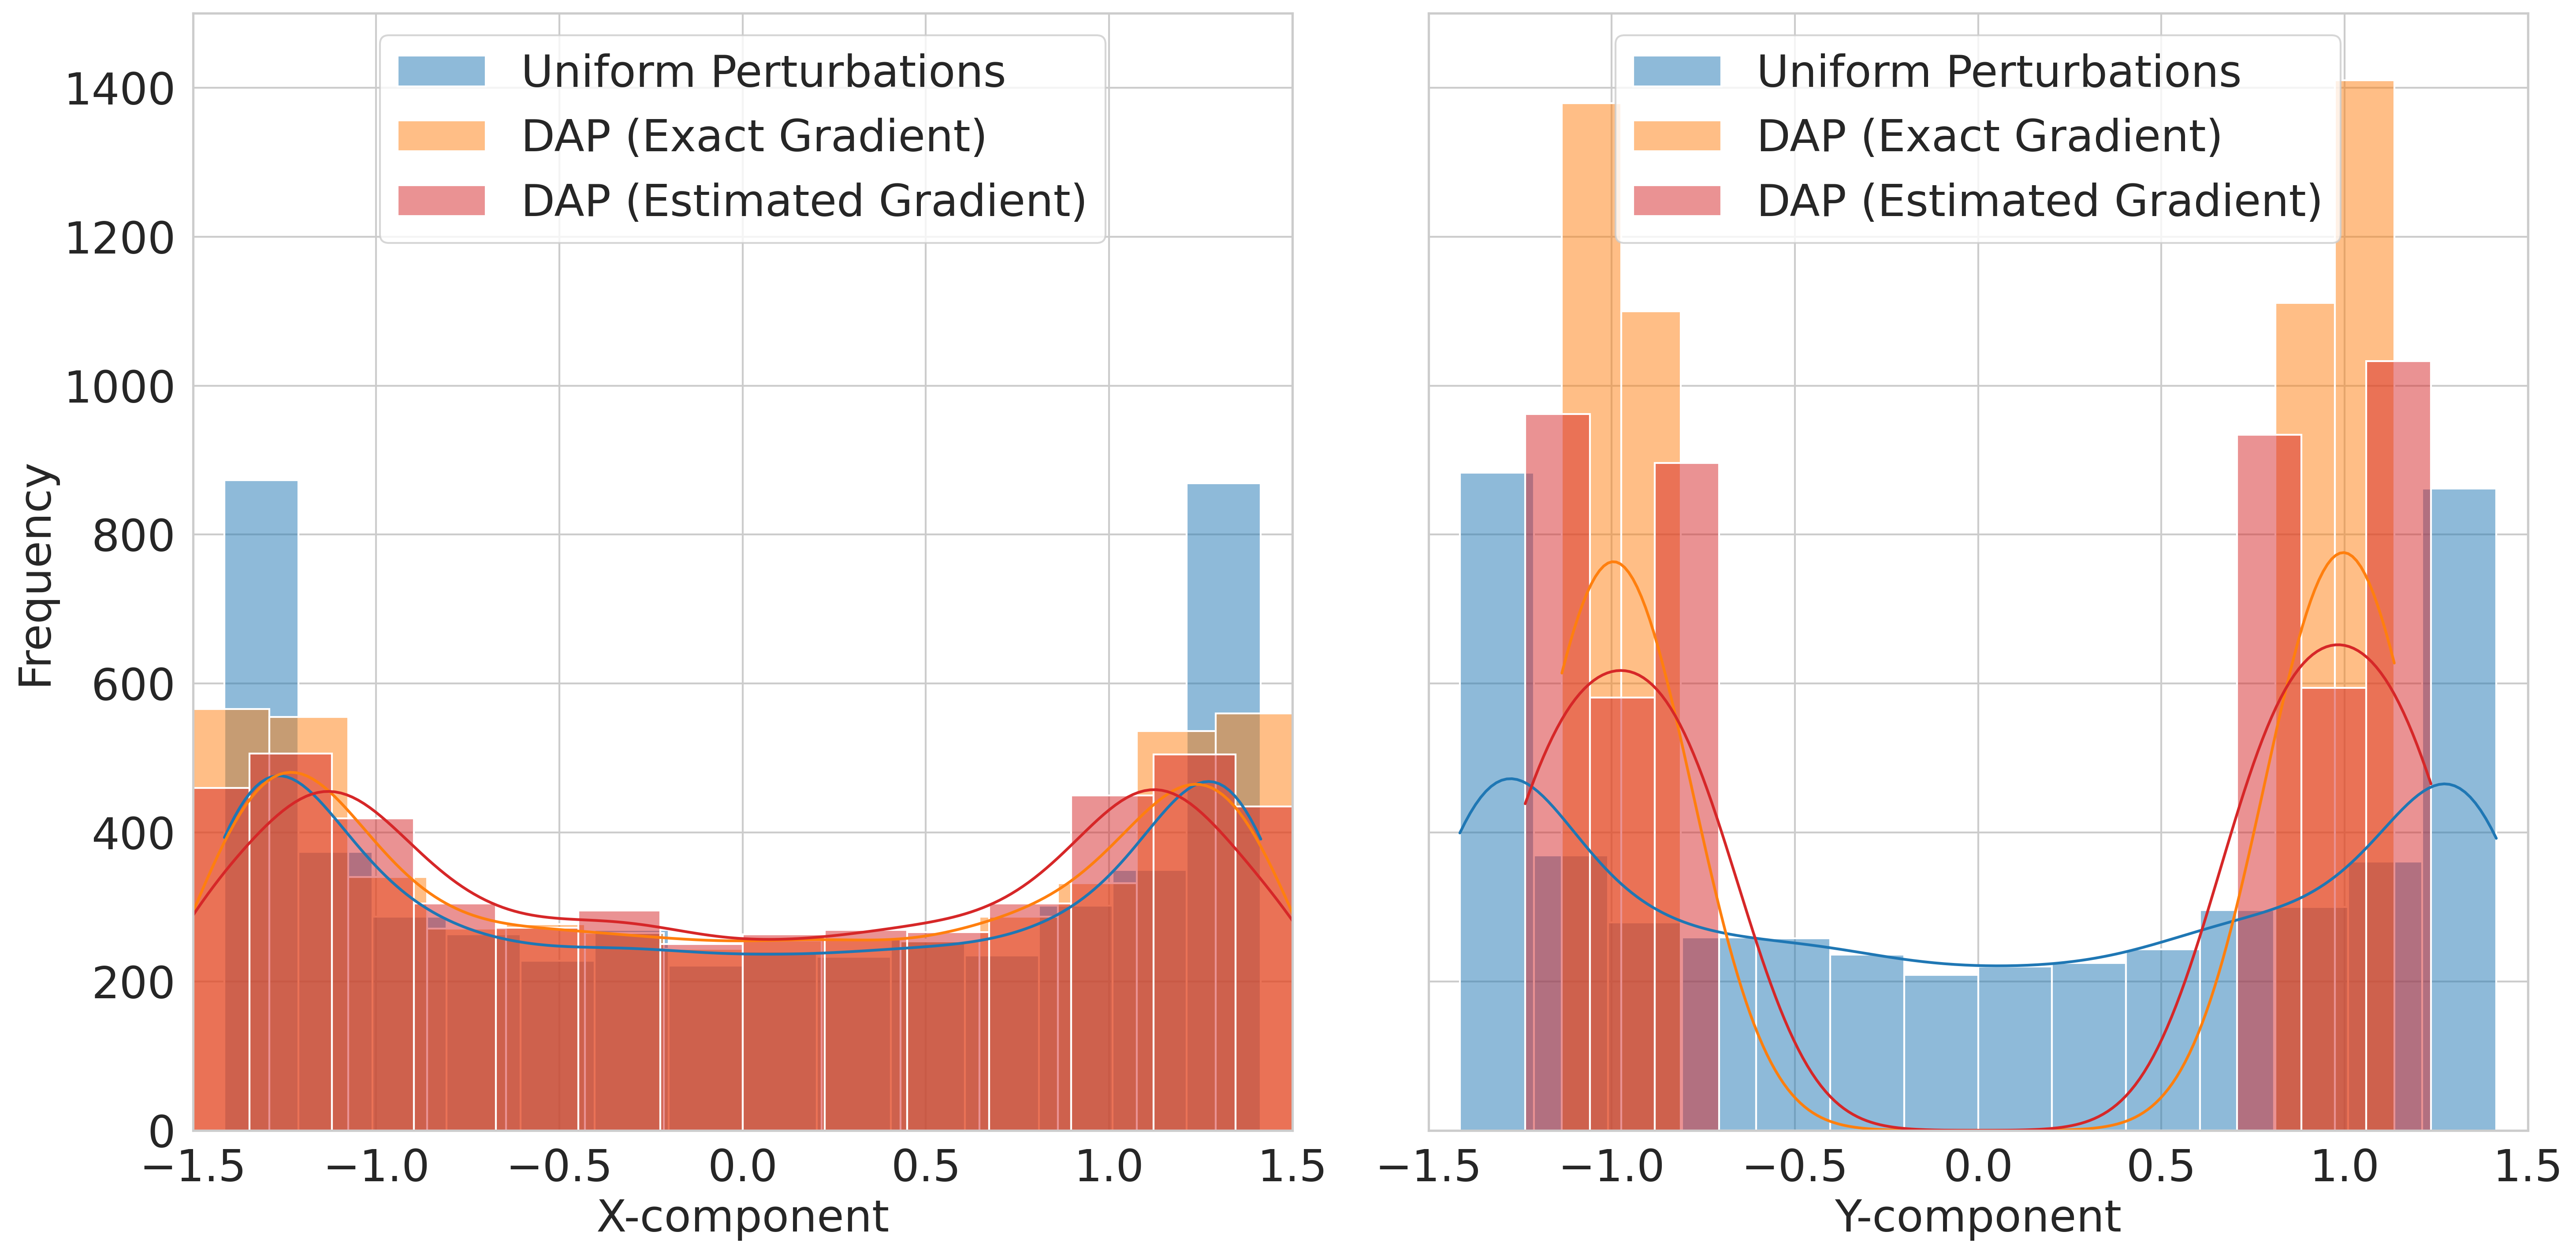

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def proj(x, a):
    n = len(a)
    a_norm_square = np.dot(a, a)
    ratio = a.dot(x) / a_norm_square
    drift = a / np.sqrt(a_norm_square)
    xi = np.random.choice([-1, 1])
    return x - ratio*a + xi * drift

# Set the style and color palette
sns.set_style("whitegrid")
sns.set_palette("tab10")

# Set the font size for all elements
plt.rcParams.update({
    'font.size': 24,
    'axes.labelsize': 24,
    'axes.titlesize': 24,
    'xtick.labelsize': 24,
    'ytick.labelsize': 24,
    'legend.fontsize': 24
})

# Generate data
np.random.seed(42)
a1 = np.array([0.2, 2.0])
a2 = np.array([0.34810399, 1.92316471])

points = np.random.normal(size=(5000, 2))
points = points / np.linalg.norm(points, axis=1)[:, np.newaxis] * np.sqrt(2)
projected_points1 = np.array([proj(x, a1) for x in points])
projected_points2 = np.array([proj(x, a2) for x in points])

# Create a new figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), sharey=True, dpi=300)

# Histogram of x-components
sns.histplot(points[:, 0], kde=True, label='Uniform Perturbations', alpha=0.5, ax=ax1, color=sns.color_palette()[0])
sns.histplot(projected_points1[:, 0], kde=True, label='DAP (Exact Gradient)', alpha=0.5, ax=ax1, color=sns.color_palette()[1])
sns.histplot(projected_points2[:, 0], kde=True, label='DAP (Estimated Gradient)', alpha=0.5, ax=ax1, color=sns.color_palette()[3])

ax1.set_xlabel('X-component')
ax1.set_ylabel('Frequency')
ax1.set_xlim([-1.5, 1.5])
ax1.set_ylim([0, 1500])
ax1.legend(loc='upper center')
# ax1.set_title('Histogram of X-components')

# Histogram of y-components
sns.histplot(points[:, 1], kde=True, label='Uniform Perturbations', alpha=0.5, ax=ax2, color=sns.color_palette()[0])
sns.histplot(projected_points1[:, 1], kde=True, label='DAP (Exact Gradient)', alpha=0.5, ax=ax2, color=sns.color_palette()[1])
sns.histplot(projected_points2[:, 1], kde=True, label='DAP (Estimated Gradient)', alpha=0.5, ax=ax2, color=sns.color_palette()[3])

ax2.set_xlabel('Y-component')
ax2.set_ylabel('Frequency')
ax2.set_xlim([-1.5, 1.5])
ax2.set_ylim([0, 1500])
ax2.legend(loc='upper center')
# ax2.set_title('Histogram of Y-components')

# Adjust layout and save figure
plt.tight_layout()
plt.savefig('side_by_side_histograms.png', dpi=300)
plt.show()

# Visualization of Cross Angles

In [ ]:
import numpy as np

def f(x):
    """
    Objective function: sum of squared elements
    """
    output = x**2
    return output.sum(axis=0)

def zeroth_order_gradient(p, u, epsilon):
    """
    Compute zeroth-order gradient estimate

    Args:
    p: point at which to estimate gradient
    u: random direction
    epsilon: small perturbation

    Returns:
    Gradient estimate
    """
    f_plus = f(p + epsilon * u)
    f_minus = f(p)
    return (1 / epsilon) * (f_plus - f_minus) * u

def estimate_gradient(p, num_samples=10, epsilon=1e-8):
    """
    Estimate gradient using multiple random directions

    Args:
    p: point at which to estimate gradient
    num_samples: number of random directions to use
    epsilon: small perturbation

    Returns:
    Average gradient estimate
    """
    dim = len(p)
    points = np.random.normal(size=(num_samples, dim))
    points = points / np.linalg.norm(points, axis=1)[:, np.newaxis] * np.sqrt(dim)

    gradients = np.array([zeroth_order_gradient(p, u, epsilon) for u in points])
    return np.mean(gradients, axis=0)

# Example usage
p = np.array([0.1, 1.0])
estimated_gradient = estimate_gradient(p, num_samples=10)
print(f"Estimated gradient at {p}: {estimated_gradient}")

# Compare with true gradient
true_gradient = 2 * p
print(f"True gradient at {p}: {true_gradient}")

Estimated gradient at [0.1 1. ]: [0.34810399 1.92316471]
True gradient at [0.1 1. ]: [0.2 2. ]


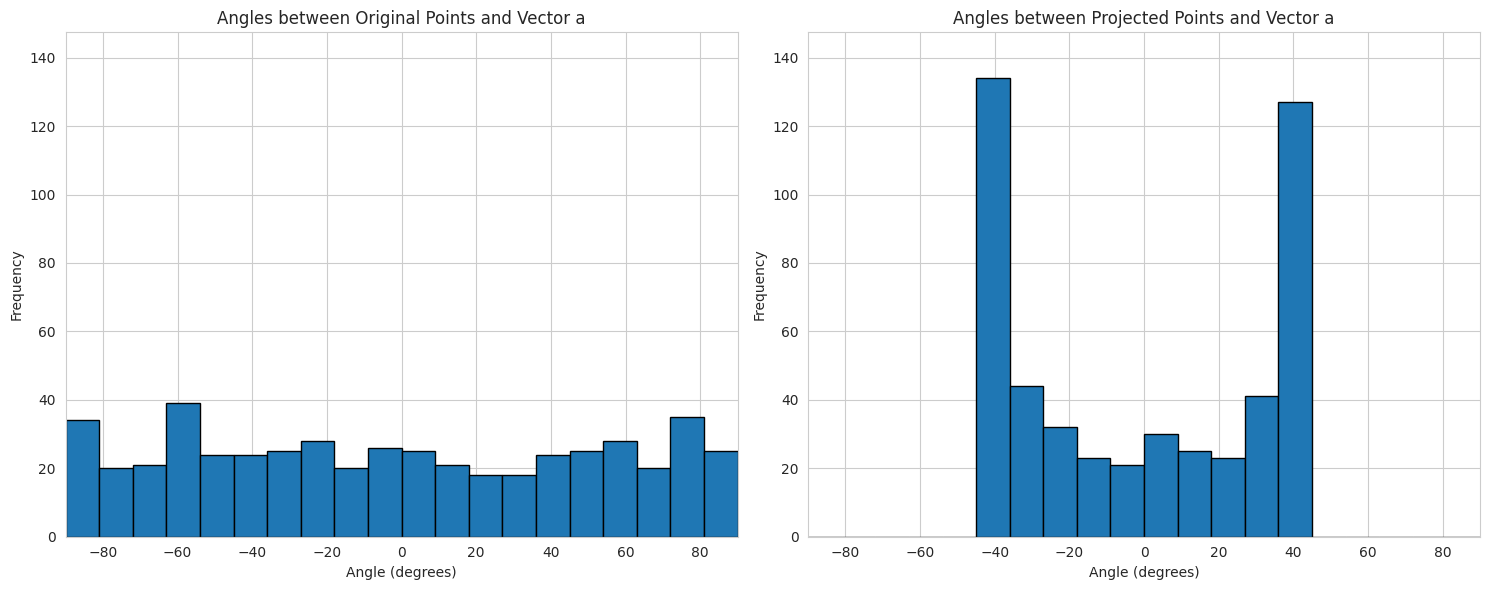

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def proj(x, a):
    n = len(a)
    a_norm_square = np.dot(a, a)
    ratio = a.dot(x) / a_norm_square
    drift = a / np.sqrt(a_norm_square)
    xi = np.random.choice([-1, 1])
    return x - ratio*a + xi * drift

def angle_between(v1, v2):
    v1_u = v1 / np.linalg.norm(v1)
    v2_u = v2 / np.linalg.norm(v2)

    # Calculate cross product and dot product
    cross_prod = np.cross(v1_u, v2_u)
    dot_prod = np.dot(v1_u, v2_u)

    # Use arctan2 to get the angle in the correct quadrant
    angle = np.arctan2(cross_prod, dot_prod)

    # Convert to degrees
    angle_deg = np.degrees(angle)

    # If the angle is greater than 90 degrees, reverse the direction of one vector
    if np.abs(angle_deg) > 90:
        angle_deg = np.degrees(np.arctan2(-cross_prod, -dot_prod))

    return angle_deg

a = np.array([0.2, 2])  # Vector a in 2D

def proj(x, a):
    n = len(a)
    a_norm_square = np.dot(a, a)
    ratio = a.dot(x) / a_norm_square
    drift = a / np.sqrt(a_norm_square)
    xi = np.random.choice([-1, 1])
    return x - ratio*a + xi * drift

# Generate 100 random points in 2D
points = np.random.normal(size=(500, 2))
points = points / np.linalg.norm(points, axis=1)[:, np.newaxis]
# Project all points
projected_points = np.array([proj(x, a) for x in points])

# Calculate angles
original_angles = np.array([angle_between(point, a) for point in points])
projected_angles = np.array([angle_between(point, a) for point in projected_points])

# Create a new figure for angle comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot histograms
bins = np.linspace(-90, 90, 21)  # 20 bins from -90 to 90
hist1, _, _ = ax1.hist(original_angles, bins=bins, edgecolor='black')
hist2, _, _ = ax2.hist(projected_angles, bins=bins, edgecolor='black')

# Find the maximum count across both histograms
max_count = max(np.max(hist1), np.max(hist2))

# Set the same y-axis limit for both plots
ax1.set_ylim(0, max_count * 1.1)  # Add 10% padding
ax2.set_ylim(0, max_count * 1.1)

# Set titles and labels
ax1.set_title('Angles between Original Points and Vector a')
ax1.set_xlabel('Angle (degrees)')
ax1.set_ylabel('Frequency')
ax1.set_xlim(-90, 90)

ax2.set_title('Angles between Projected Points and Vector a')
ax2.set_xlabel('Angle (degrees)')
ax2.set_ylabel('Frequency')
ax2.set_xlim(-90, 90)

plt.tight_layout()
plt.savefig('angle_comparison_scaled.png', dpi=300, bbox_inches='tight')
plt.show()

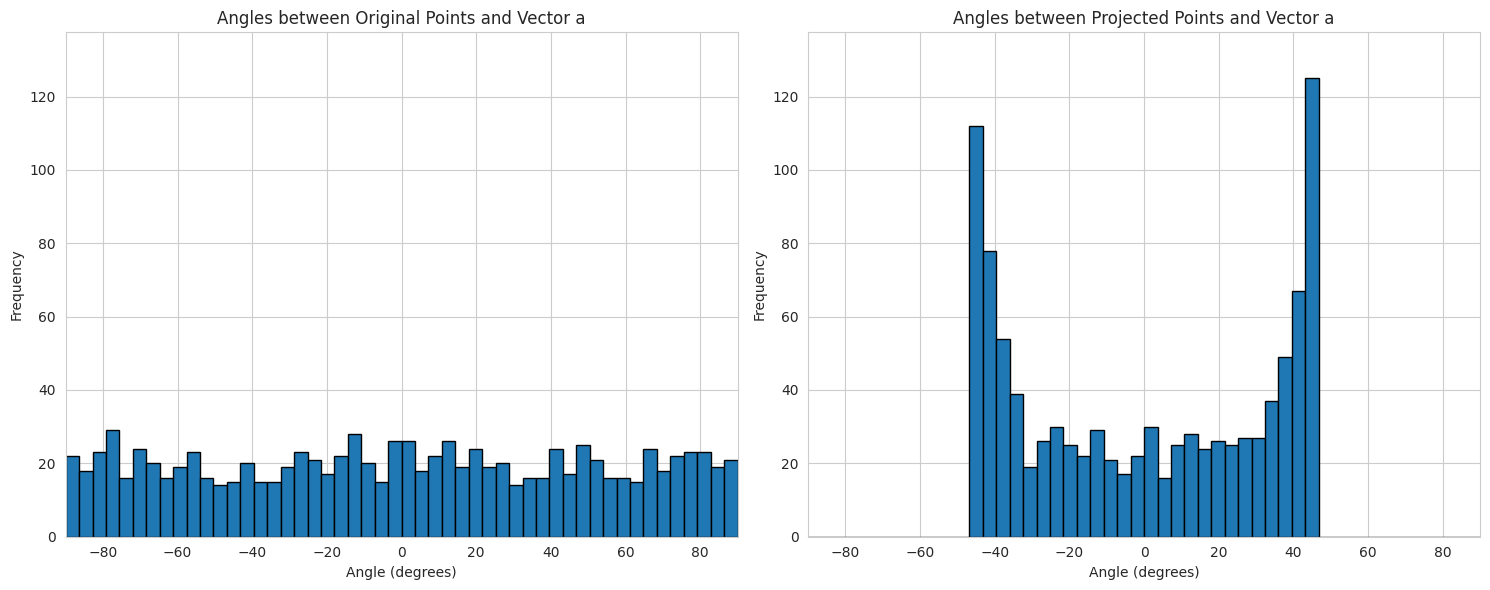

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def angle_between(v1, v2):
    v1_u = v1 / np.linalg.norm(v1)
    v2_u = v2 / np.linalg.norm(v2)

    # Calculate cross product and dot product
    cross_prod = np.cross(v1_u, v2_u)
    dot_prod = np.dot(v1_u, v2_u)

    # Use arctan2 to get the angle in the correct quadrant
    angle = np.arctan2(cross_prod, dot_prod)

    # Convert to degrees
    angle_deg = np.degrees(angle)

    # If the angle is greater than 90 degrees, reverse the direction of one vector
    if np.abs(angle_deg) > 90:
        angle_deg = np.degrees(np.arctan2(-cross_prod, -dot_prod))

    return angle_deg

a = np.array([1, 0])  # Vector a in 2D

def proj(x, a):
    n = len(a)
    a_norm_square = np.dot(a, a)
    ratio = a.dot(x) / a_norm_square
    drift = a / np.sqrt(a_norm_square)
    xi = np.random.choice([-1, 1])
    return x - ratio*a + xi * drift

# Generate 100 random points in 2D
points = np.random.normal(size=(1000, 2))
points = points / np.linalg.norm(points, axis=1)[:, np.newaxis]
# Project all points
projected_points = np.array([proj(x, a) for x in points])

# Calculate angles
original_angles = np.array([angle_between(point, a) for point in points])
projected_angles = np.array([angle_between(point, a) for point in projected_points])

# Create a new figure for angle comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot histograms
bins = np.linspace(-90, 90, 51)  # 20 bins from -90 to 90
hist1, _, _ = ax1.hist(original_angles, bins=bins, edgecolor='black')
hist2, _, _ = ax2.hist(projected_angles, bins=bins, edgecolor='black')

# Find the maximum count across both histograms
max_count = max(np.max(hist1), np.max(hist2))

# Set the same y-axis limit for both plots
ax1.set_ylim(0, max_count * 1.1)  # Add 10% padding
ax2.set_ylim(0, max_count * 1.1)

# Set titles and labels
ax1.set_title('Angles between Original Points and Vector a')
ax1.set_xlabel('Angle (degrees)')
ax1.set_ylabel('Frequency')
ax1.set_xlim(-90, 90)

ax2.set_title('Angles between Projected Points and Vector a')
ax2.set_xlabel('Angle (degrees)')
ax2.set_ylabel('Frequency')
ax2.set_xlim(-90, 90)

plt.tight_layout()
plt.savefig('angle_comparison_scaled.png', dpi=300, bbox_inches='tight')
plt.show()

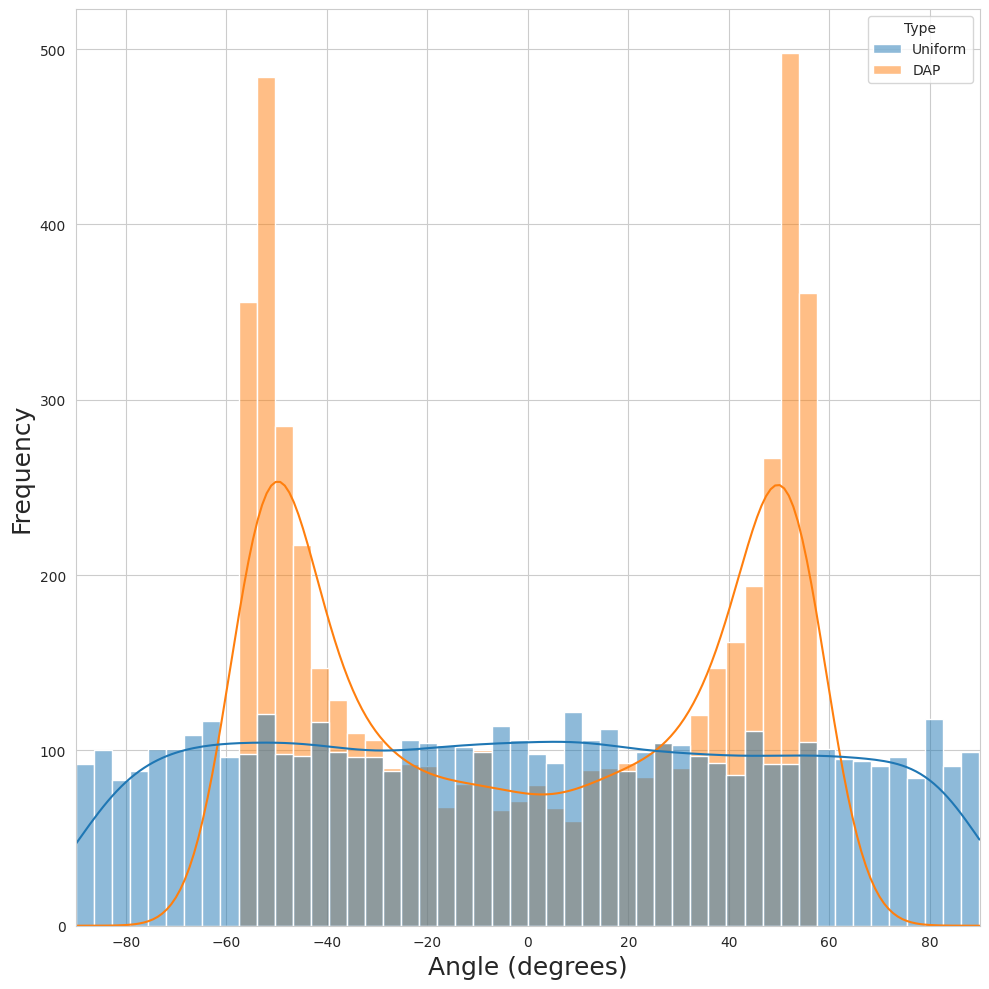

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


def angle_between(v1, v2):
    v1_u = v1 / np.linalg.norm(v1)
    v2_u = v2 / np.linalg.norm(v2)

    # Calculate cross product and dot product
    cross_prod = np.cross(v1_u, v2_u)
    dot_prod = np.dot(v1_u, v2_u)

    # Use arctan2 to get the angle in the correct quadrant
    angle = np.arctan2(cross_prod, dot_prod)

    # Convert to degrees
    angle_deg = np.degrees(angle)

    # If the angle is greater than 90 degrees, reverse the direction of one vector
    if np.abs(angle_deg) > 90:
        angle_deg = np.degrees(np.arctan2(-cross_prod, -dot_prod))

    return angle_deg


a = np.array([0.2, 2])  # Vector a in 2D

def proj(x, a):
    n = len(a)
    a_norm_square = np.dot(a, a)
    ratio = a.dot(x) / a_norm_square
    drift = a / np.sqrt(a_norm_square)
    xi = np.random.choice([-1, 1])
    return x - ratio*a + xi * drift

# Generate 500 random points in 2D
points = np.random.normal(size=(5000, 2))
points = points / np.linalg.norm(points, axis=1)[:, np.newaxis] * np.sqrt(2)
# Project all points
projected_points = np.array([proj(x, a) for x in points])

# Calculate angles
original_angles = np.array([angle_between(point, a) for point in points])
projected_angles = np.array([angle_between(point, a) for point in projected_points])

# Create a DataFrame for seaborn
df = pd.DataFrame({
    'Angle': np.concatenate([original_angles, projected_angles]),
    'Type': ['Uniform']*len(original_angles) + ['DAP']*len(projected_angles)
})

# Set up the plot style
sns.set_style("whitegrid")
sns.set_palette("tab10")

# Create a new figure for angle comparison
fig, ax = plt.subplots(figsize=(10, 10))

# Plot overlapping histograms using seaborn
sns.histplot(data=df, x='Angle', hue='Type', multiple="layer", bins=50, kde=True, ax=ax, alpha=0.5)

# Set titles and labels
# ax.set_title('Angles between Points and Vector a', fontsize=18)
ax.set_xlabel('Angle (degrees)', fontsize=18)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlim(-90, 90)

# Add a legend
# ax.legend(fontsize=18)

plt.tight_layout()
plt.savefig('angle_comparison_seaborn_overlapped.png', dpi=300, bbox_inches='tight')
plt.show()


Visualizing 2-dimensional projection:


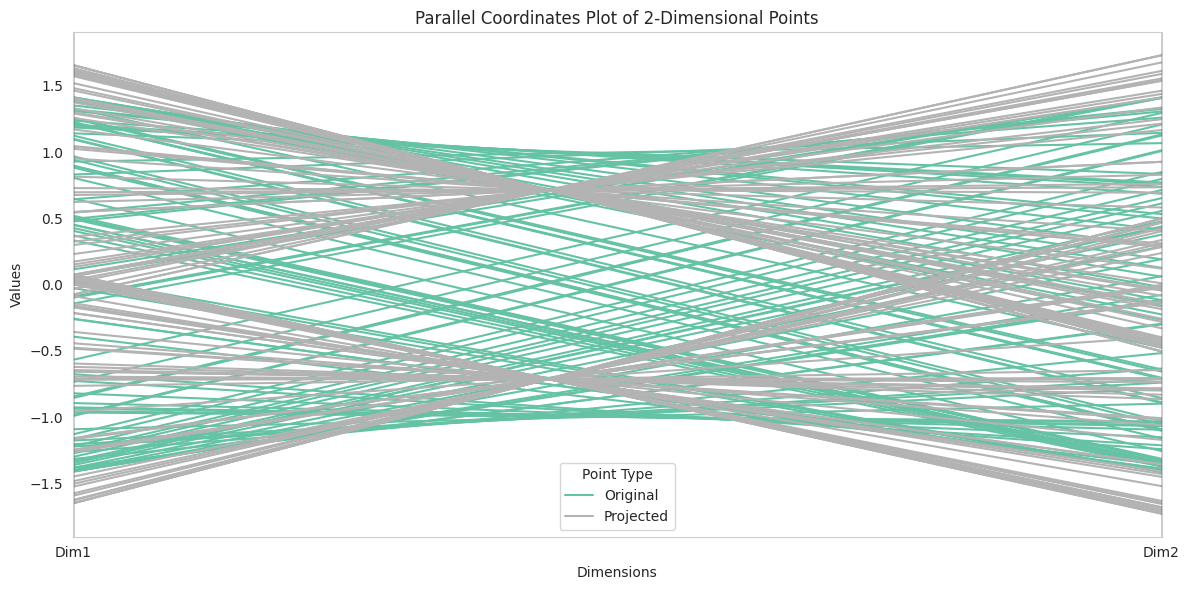

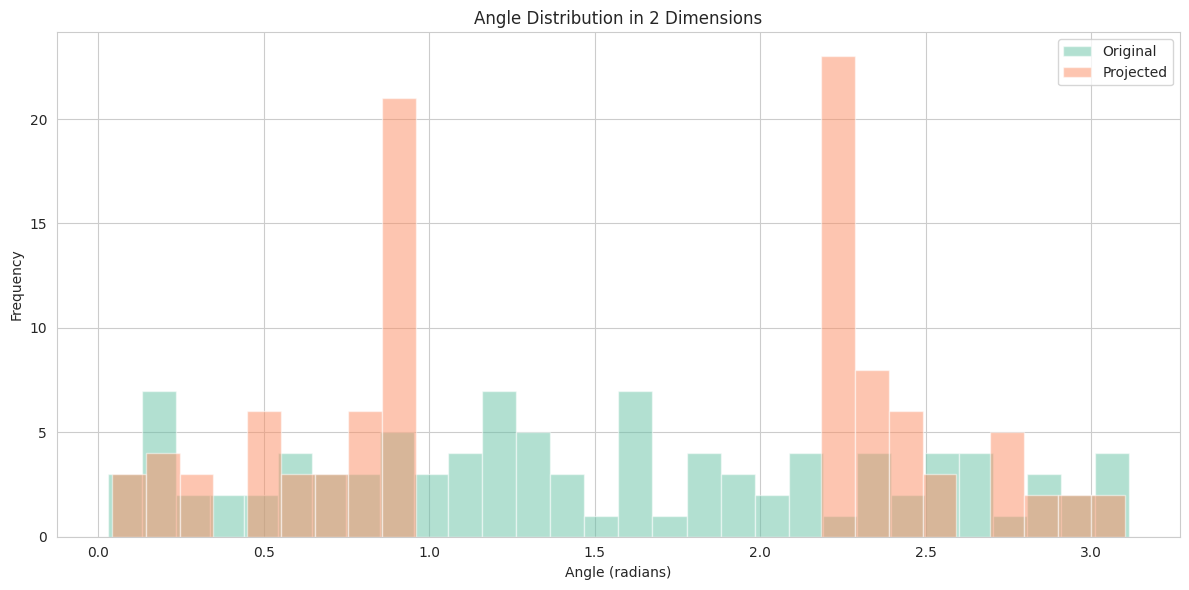


Visualizing 3-dimensional projection:


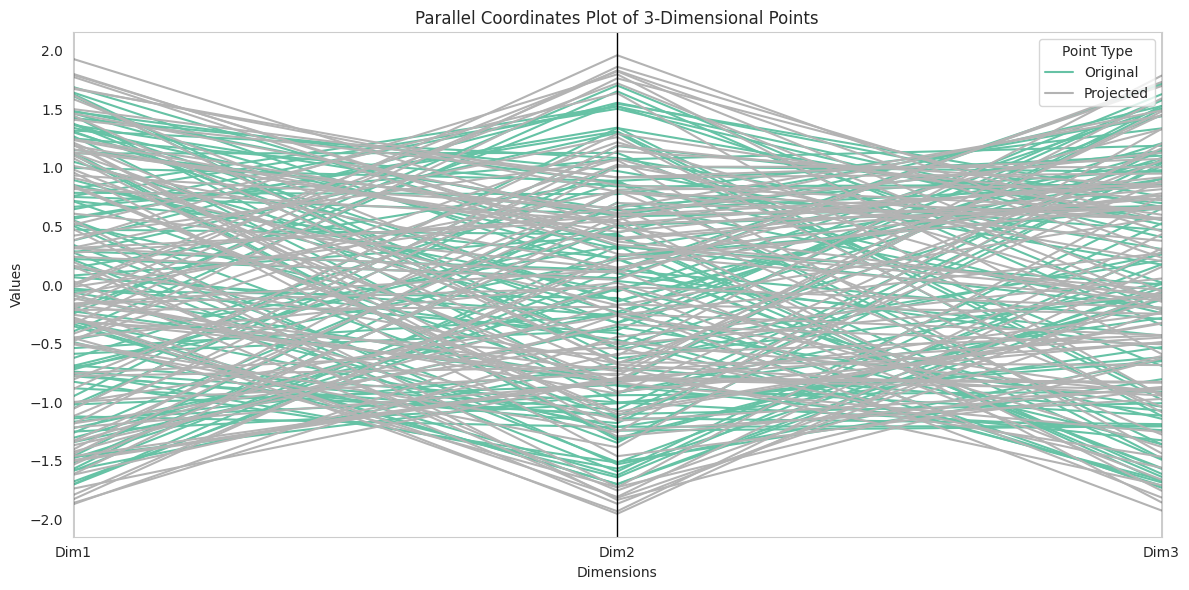

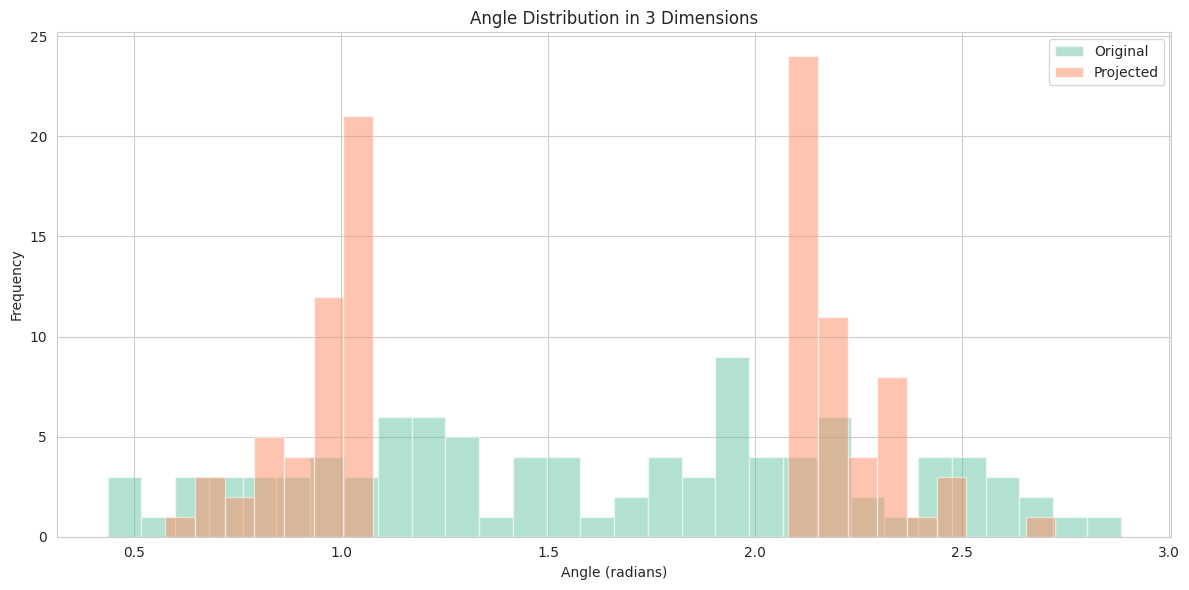


Visualizing 5-dimensional projection:


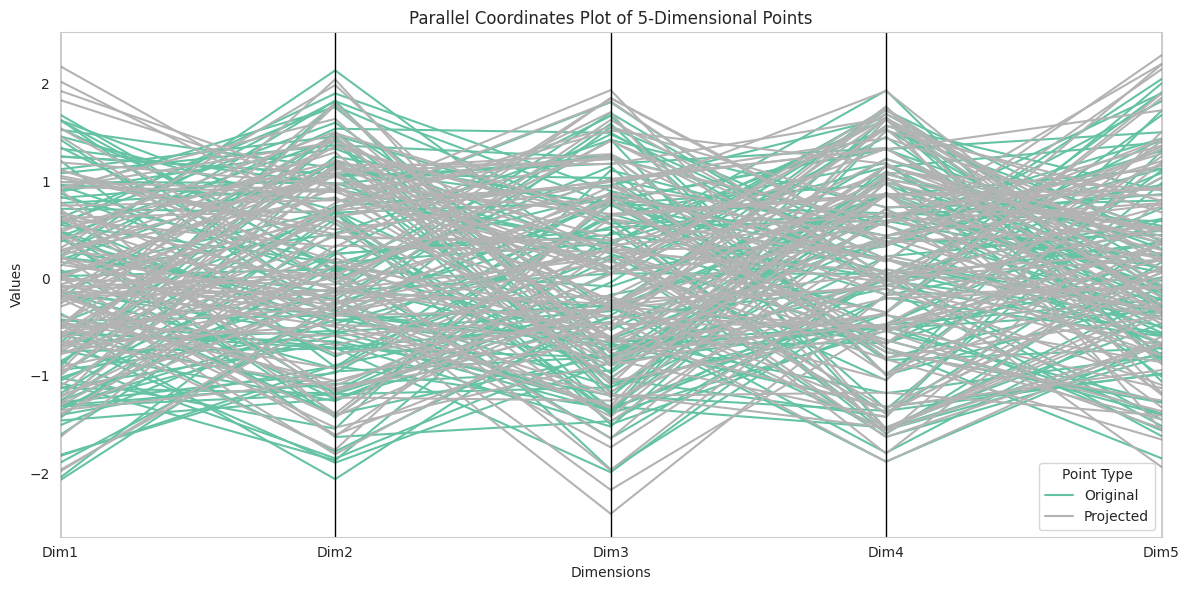

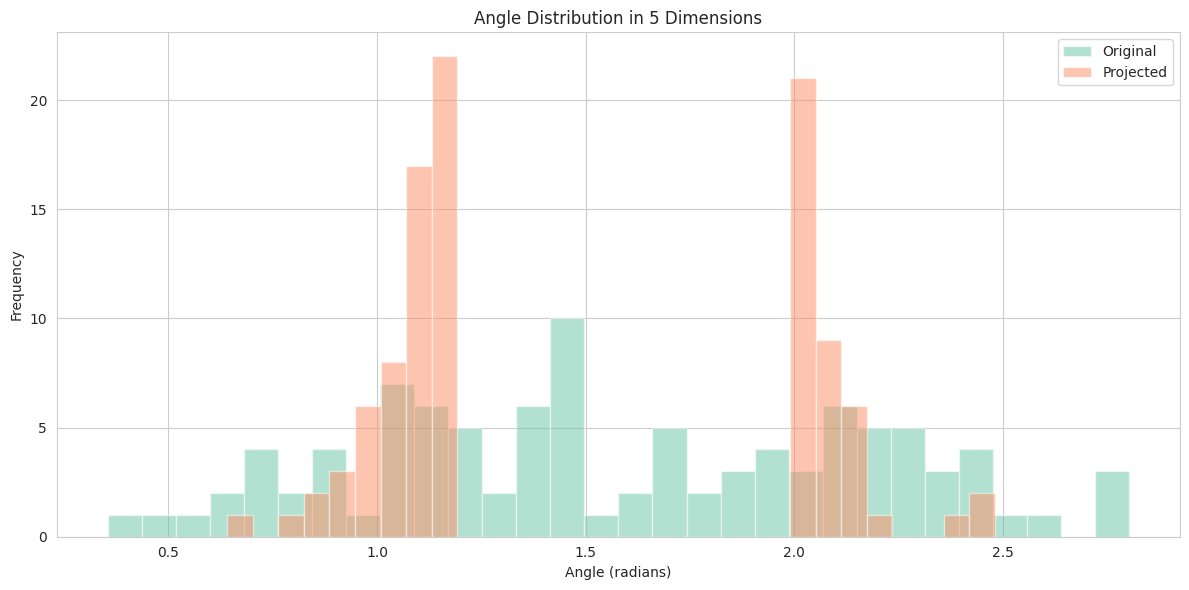


Visualizing 10-dimensional projection:


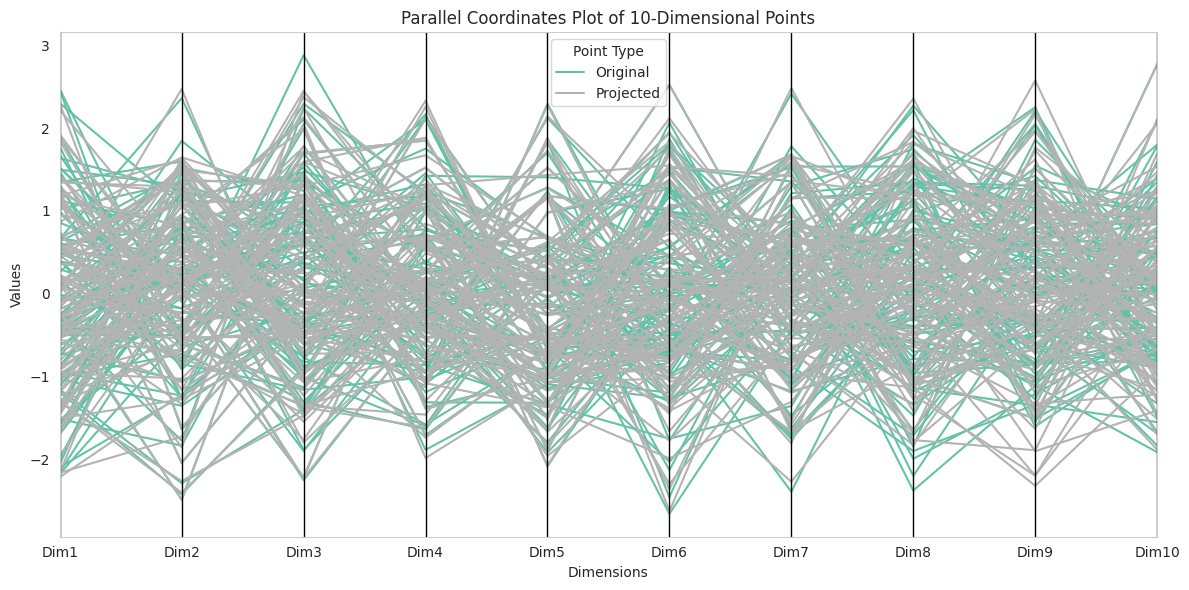

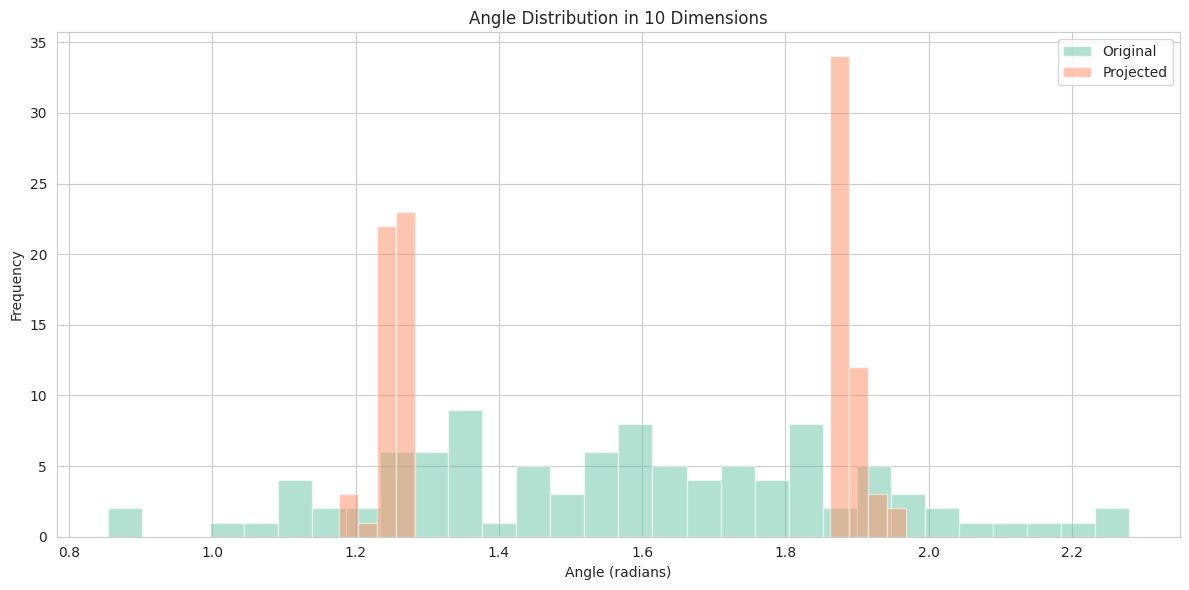

Visualization complete. Check the saved PNG files for results.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import special_ortho_group

def angle_between(v1, v2):
    v1_u = v1 / np.linalg.norm(v1)
    v2_u = v2 / np.linalg.norm(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

def proj(x, a):
    a_norm_square = np.dot(a, a)
    ratio = a.dot(x) / a_norm_square
    drift = a / np.sqrt(a_norm_square)
    xi = np.random.choice([-1, 1])
    return x - ratio*a + xi * drift

def generate_points(n_points, dim):
    points = np.random.normal(size=(n_points, dim))
    return points / np.linalg.norm(points, axis=1)[:, np.newaxis] * np.sqrt(dim)

def project_points(points, a):
    return np.array([proj(x, a) for x in points])

def calculate_angles(points, a):
    return np.array([angle_between(point, a) for point in points])

def visualize_parallel_coordinates(original_points, projected_points, a, n_sample=100):
    n_points, dim = original_points.shape

    # Sample points if there are too many
    if n_points > n_sample:
        idx = np.random.choice(n_points, n_sample, replace=False)
        original_points = original_points[idx]
        projected_points = projected_points[idx]

    # Prepare data for parallel coordinates plot
    df_original = pd.DataFrame(original_points, columns=[f'Dim{i+1}' for i in range(dim)])
    df_original['Type'] = 'Original'
    df_projected = pd.DataFrame(projected_points, columns=[f'Dim{i+1}' for i in range(dim)])
    df_projected['Type'] = 'Projected'
    df = pd.concat([df_original, df_projected])

    # Create parallel coordinates plot
    plt.figure(figsize=(12, 6))
    pd.plotting.parallel_coordinates(df, 'Type', colormap=plt.cm.Set2)
    plt.title(f'Parallel Coordinates Plot of {dim}-Dimensional Points')
    plt.xlabel('Dimensions')
    plt.ylabel('Values')
    plt.legend(title='Point Type')
    plt.tight_layout()
    plt.savefig(f'parallel_coordinates_{dim}d.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Plot angle distribution
    original_angles = calculate_angles(original_points, a)
    projected_angles = calculate_angles(projected_points, a)

    plt.figure(figsize=(12, 6))
    plt.hist(original_angles, bins=30, alpha=0.5, label='Original')
    plt.hist(projected_angles, bins=30, alpha=0.5, label='Projected')
    plt.title(f'Angle Distribution in {dim} Dimensions')
    plt.xlabel('Angle (radians)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'angle_distribution_{dim}d.png', dpi=300, bbox_inches='tight')
    plt.show()

# Set parameters
n_points = 1000
dims = [2, 3, 5, 10]  # Dimensions to visualize

for dim in dims:
    print(f"\nVisualizing {dim}-dimensional projection:")

    # Generate random vector a
    a = special_ortho_group.rvs(dim)[0]

    # Generate points
    points = generate_points(n_points, dim)

    # Project points
    projected_points = project_points(points, a)

    # Visualize
    visualize_parallel_coordinates(points, projected_points, a)

print("Visualization complete. Check the saved PNG files for results.")

# Visualization of Estimation Errors

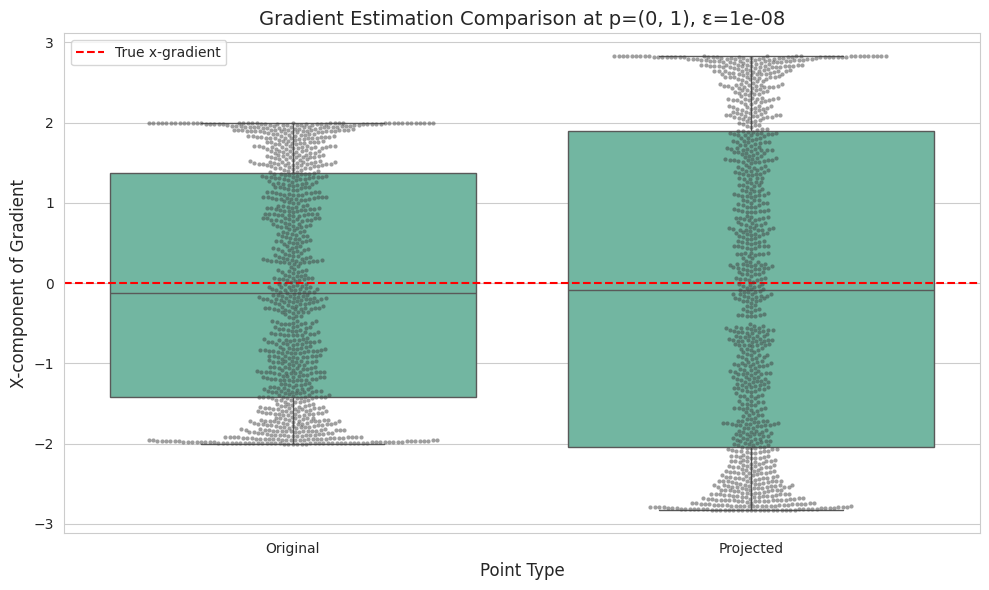

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def f(x, y):
    return x**2 + y**2

def proj(x, a):
    n = len(a)
    a_norm_square = np.dot(a, a)
    ratio = a.dot(x) / a_norm_square
    drift = a / np.sqrt(a_norm_square)
    xi = np.random.choice([-1, 1])
    return x - ratio*a + xi * drift

def zeroth_order_gradient(p, u, epsilon):
    f_plus = f(*(p + epsilon * u))
    f_minus = f(*p)
    return (1 / epsilon) * (f_plus - f_minus) * u

# Set the point p and epsilon
# p = np.array([0.1, 1])
p = np.array([0, 1])
epsilon = 1e-8  # Fixed epsilon value
# a = np.array([0.2, 2])
a = np.array([0, 2])  # Vector a for projection

# Generate points
num_points = 1000
points = np.random.normal(size=(num_points, 2))
points = points / np.linalg.norm(points, axis=1)[:, np.newaxis] * np.sqrt(2)

# Project points
projected_points = np.array([proj(x, a) for x in points])

# Calculate gradient estimates
original_gradients = np.array([zeroth_order_gradient(p, u, epsilon) for u in points])
projected_gradients = np.array([zeroth_order_gradient(p, u, epsilon) for u in projected_points])

# Extract x-components of gradients
original_x_gradients = original_gradients[:, 0]
projected_x_gradients = projected_gradients[:, 0]

# Create a DataFrame for seaborn
df = pd.DataFrame({
    'Gradient': np.concatenate([original_x_gradients, projected_x_gradients]),
    'Type': ['Original']*num_points + ['Projected']*num_points
})

# Calculate the true gradient for comparison
true_gradient = np.array([2 * 0.01 * p[0], 2 * p[1]])

# Set up the plot style
sns.set_style("whitegrid")
sns.set_palette("Set2")

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Gradient', data=df)
sns.swarmplot(x='Type', y='Gradient', data=df, color=".25", size=3, alpha=0.5)

# Add a horizontal line for the true x-gradient
plt.axhline(y=true_gradient[0], color='r', linestyle='--', label='True x-gradient')

plt.title(f'Gradient Estimation Comparison at p=({p[0]}, {p[1]}), ε={epsilon}', fontsize=14)
plt.xlabel('Point Type', fontsize=12)
plt.ylabel('X-component of Gradient', fontsize=12)
plt.legend(fontsize=10)

plt.tight_layout()
plt.savefig('gradient_estimation_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

<ipython-input-11-1e32374586b1>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y='X Gradient', data=df, ax=ax1,
<ipython-input-11-1e32374586b1>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y='Y Gradient', data=df, ax=ax2,
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 11.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


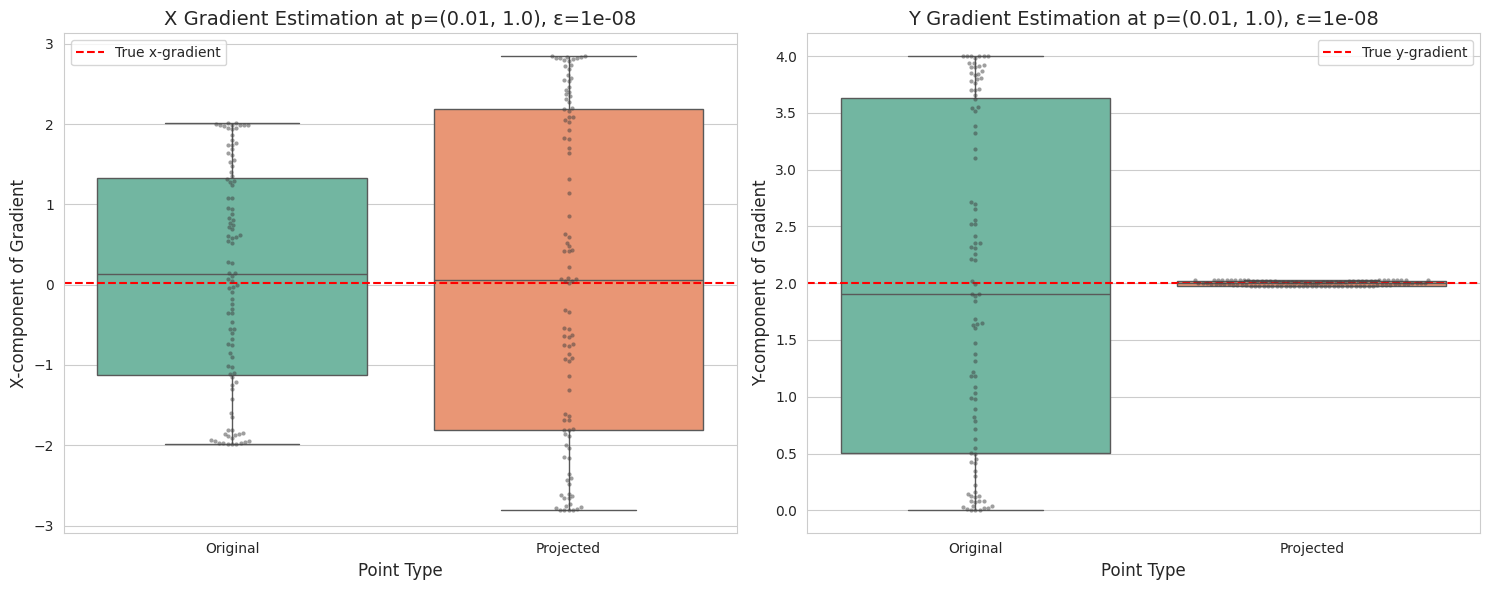

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def f(x, y):
    return x**2 + y**2

def proj(x, a):
    n = len(a)
    a_norm_square = np.dot(a, a)
    ratio = a.dot(x) / a_norm_square
    drift = a / np.sqrt(a_norm_square)
    xi = np.random.choice([-1, 1])
    return x - ratio*a + xi * drift

def zeroth_order_gradient(p, u, epsilon):
    f_plus = f(*(p + epsilon * u))
    f_minus = f(*p)
    return (1 / epsilon) * (f_plus - f_minus) * u


# Set the point p and epsilon
# p = np.array([0.1, 1])
p = np.array([0.01, 1])
epsilon = 1e-8  # Fixed epsilon value
# a = np.array([0.2, 2])
a = np.array([0.02, 2])  # Vector a for projection

# Generate points
num_points = 100
points = np.random.normal(size=(num_points, 2))
points = points / np.linalg.norm(points, axis=1)[:, np.newaxis] * np.sqrt(2)

# Project points
projected_points = np.array([proj(x, a) for x in points])

# Calculate gradient estimates
original_gradients = np.array([zeroth_order_gradient(p, u, epsilon) for u in points])
projected_gradients = np.array([zeroth_order_gradient(p, u, epsilon) for u in projected_points])

# Create a DataFrame for seaborn
df = pd.DataFrame({
    'X Gradient': np.concatenate([original_gradients[:, 0], projected_gradients[:, 0]]),
    'Y Gradient': np.concatenate([original_gradients[:, 1], projected_gradients[:, 1]]),
    'Type': ['Original']*num_points + ['Projected']*num_points
})

# Calculate the true gradient for comparison
true_gradient = np.array([2 * p[0], 2 * p[1]])

# Set up the plot style
sns.set_style("whitegrid")

# Define colors
original_color = sns.color_palette()[0]  # First color in the default palette
projected_color = sns.color_palette()[1]  # Second color in the default palette

# Create the box plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# X Gradient
sns.boxplot(x='Type', y='X Gradient', data=df, ax=ax1,
            palette={
                'Original': original_color,
                'Projected': projected_color
            })
sns.swarmplot(x='Type', y='X Gradient', data=df, color=".25", size=3, alpha=0.5, ax=ax1)
ax1.axhline(y=true_gradient[0], color='r', linestyle='--', label='True x-gradient')
ax1.set_title(f'X Gradient Estimation at p=({p[0]}, {p[1]}), ε={epsilon}', fontsize=14)
ax1.set_xlabel('Point Type', fontsize=12)
ax1.set_ylabel('X-component of Gradient', fontsize=12)
ax1.legend(fontsize=10)

# Y Gradient
sns.boxplot(x='Type', y='Y Gradient', data=df, ax=ax2,
            palette={
                'Original': original_color,
                'Projected': projected_color
            })
sns.swarmplot(x='Type', y='Y Gradient', data=df, color=".25", size=3, alpha=0.5, ax=ax2)
ax2.axhline(y=true_gradient[1], color='r', linestyle='--', label='True y-gradient')
ax2.set_title(f'Y Gradient Estimation at p=({p[0]}, {p[1]}), ε={epsilon}', fontsize=14)
ax2.set_xlabel('Point Type', fontsize=12)
ax2.set_ylabel('Y-component of Gradient', fontsize=12)
ax2.legend(fontsize=10)

plt.tight_layout()
plt.savefig('gradient_estimation_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

<ipython-input-20-a48a912a8c47>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y='X Gradient', data=df, ax=ax1,
<ipython-input-20-a48a912a8c47>:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y='Y Gradient', data=df, ax=ax2,
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


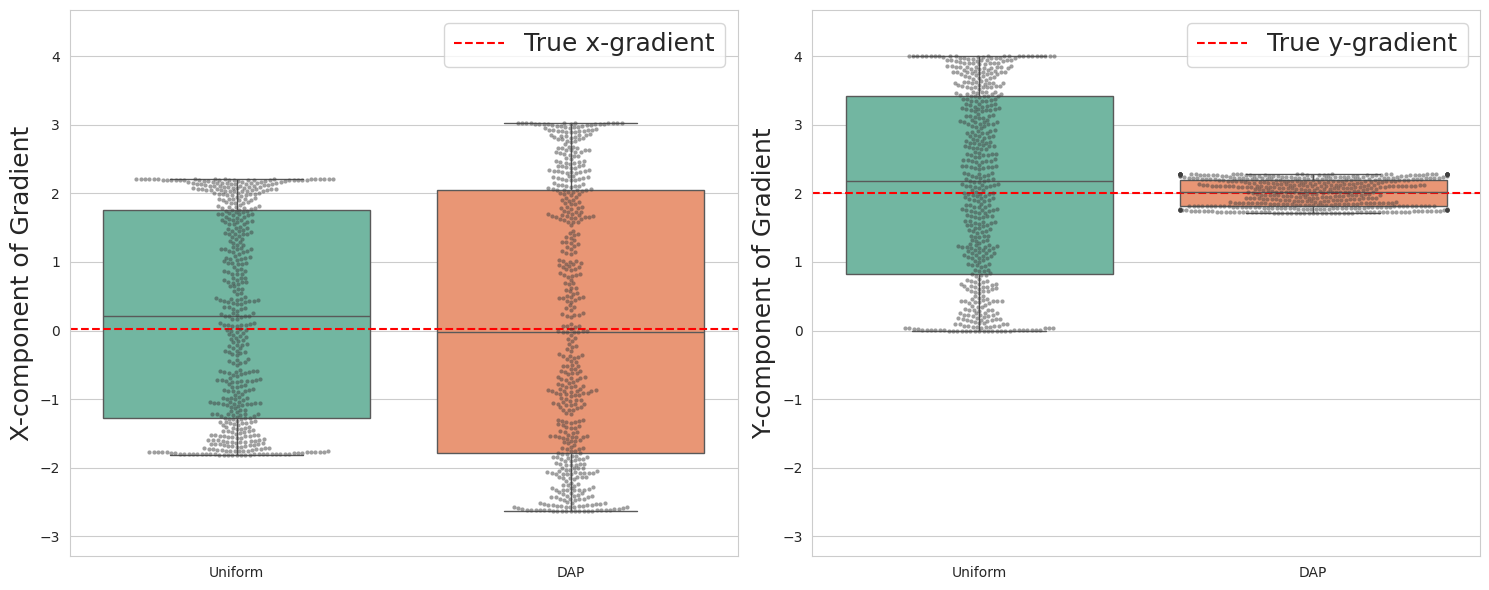

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def f(x, y):
    return x**2 + y**2

def proj(x, a):
    n = len(a)
    a_norm_square = np.dot(a, a)
    ratio = a.dot(x) / a_norm_square
    drift = a / np.sqrt(a_norm_square)
    xi = np.random.choice([-1, 1])
    return x - ratio*a + xi * drift

def zeroth_order_gradient(p, u, epsilon):
    f_plus = f(*(p + epsilon * u))
    f_minus = f(*p)
    return (1 / epsilon) * (f_plus - f_minus) * u

# Set the point p and epsilon
p = np.array([0.1, 1])
epsilon = 1e-8  # Fixed epsilon value
a = np.array([0.2, 2])  # Vector a for projection

# Generate points
num_points = 500
points = np.random.normal(size=(num_points, 2))
points = points / np.linalg.norm(points, axis=1)[:, np.newaxis] * np.sqrt(2)

# Project points
projected_points = np.array([proj(x, a) for x in points])

# Calculate gradient estimates
original_gradients = np.array([zeroth_order_gradient(p, u, epsilon) for u in points])
projected_gradients = np.array([zeroth_order_gradient(p, u, epsilon) for u in projected_points])

# Create a DataFrame for seaborn
df = pd.DataFrame({
    'X Gradient': np.concatenate([original_gradients[:, 0], projected_gradients[:, 0]]),
    'Y Gradient': np.concatenate([original_gradients[:, 1], projected_gradients[:, 1]]),
    'Type': ['Uniform']*num_points + ['DAP']*num_points
})

# Calculate the true gradient for comparison
true_gradient = np.array([2 * 0.1 * p[0], 2 * p[1]])

# Set up the plot style
sns.set_style("whitegrid")

# Define colors
original_color = sns.color_palette()[0]  # First color in the default palette
projected_color = sns.color_palette()[1]  # Second color in the default palette

# Create the box plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Find overall min and max for both X and Y gradients
y_min = min(df['X Gradient'].min(), df['Y Gradient'].min())
y_max = max(df['X Gradient'].max(), df['Y Gradient'].max())

# Add some padding to the y-axis limits
y_range = y_max - y_min
y_min -= 0.1 * y_range
y_max += 0.1 * y_range

# X Gradient
sns.boxplot(x='Type', y='X Gradient', data=df, ax=ax1,
            palette={
                'Uniform': original_color,
                'DAP': projected_color
            })
sns.swarmplot(x='Type', y='X Gradient', data=df, color=".25", size=3, alpha=0.5, ax=ax1)
# sns.stripplot(x='Type', y='X Gradient', data=df, color=".25", size=3, alpha=0.5, ax=ax1)
ax1.axhline(y=true_gradient[0], color='r', linestyle='--', label='True x-gradient')
#ax1.set_title(f'X Gradient Estimation at p=({p[0]}, {p[1]}), ε={epsilon}', fontsize=14)
ax1.set_xlabel('', fontsize=18)
ax1.set_ylabel('X-component of Gradient', fontsize=18)
ax1.legend(fontsize=18)
ax1.set_ylim(y_min, y_max)

# Y Gradient
sns.boxplot(x='Type', y='Y Gradient', data=df, ax=ax2,
            palette={
                'Uniform': original_color,
                'DAP': projected_color
            })
sns.swarmplot(x='Type', y='Y Gradient', data=df, color=".25", size=3, alpha=0.5, ax=ax2)
# sns.stripplot(x='Type', y='Y Gradient', data=df, color=".25", size=3, alpha=0.5, ax=ax2)
ax2.axhline(y=true_gradient[1], color='r', linestyle='--', label='True y-gradient')
#ax2.set_title(f'Y Gradient Estimation at p=({p[0]}, {p[1]}), ε={epsilon}', fontsize=14)
ax2.set_xlabel('', fontsize=18)
ax2.set_ylabel('Y-component of Gradient', fontsize=18)
ax2.legend(fontsize=18)
ax2.set_ylim(y_min, y_max)

plt.tight_layout()
plt.savefig('gradient_estimation_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle

def f(x, y):
    return x**2 + y**2

def proj(x, a):
    n = len(a)
    a_norm_square = np.dot(a, a)
    ratio = a.dot(x) / a_norm_square
    drift = a / np.sqrt(a_norm_square)
    xi = np.random.choice([-1, 1])
    return x - ratio*a + xi * drift

def zeroth_order_gradient(p, u, epsilon):
    f_plus = f(*(p + epsilon * u))
    f_minus = f(*p)
    return (1 / epsilon) * (f_plus - f_minus) * u

def generate_data():
    # Set the point p and epsilon
    p = np.array([0.1, 1])
    epsilon = 1e-8  # Fixed epsilon value
    a = np.array([0.2, 2])  # Vector a for projection

    # Generate points
    num_points = 500
    points = np.random.normal(size=(num_points, 2))
    points = points / np.linalg.norm(points, axis=1)[:, np.newaxis] * np.sqrt(2)

    # Project points
    projected_points = np.array([proj(x, a) for x in points])

    # Calculate gradient estimates
    original_gradients = np.array([zeroth_order_gradient(p, u, epsilon) for u in points])
    projected_gradients = np.array([zeroth_order_gradient(p, u, epsilon) for u in projected_points])

    # Calculate the true gradient for comparison
    true_gradient = np.array([2 * p[0], 2 * p[1]])

    return {
        'p': p,
        'epsilon': epsilon,
        'a': a,
        'original_gradients': original_gradients,
        'projected_gradients': projected_gradients,
        'true_gradient': true_gradient
    }

def save_data(data, filename='gradient_data.pkl'):
    with open(filename, 'wb') as f:
        pickle.dump(data, f)

def load_data(filename='gradient_data.pkl'):
    with open(filename, 'rb') as f:
        return pickle.load(f)

def plot_data(data):
    # Create a DataFrame for seaborn
    num_points = len(data['original_gradients'])
    df = pd.DataFrame({
        'X Gradient': np.concatenate([data['original_gradients'][:, 0], data['projected_gradients'][:, 0]]),
        'Y Gradient': np.concatenate([data['original_gradients'][:, 1], data['projected_gradients'][:, 1]]),
        'Type': ['Original']*num_points + ['Projected']*num_points
    })

    # Set up the plot style
    sns.set_style("whitegrid")

    # Define colors
    original_color = sns.color_palette()[0]  # First color in the default palette
    projected_color = sns.color_palette()[1]  # Second color in the default palette

    # Create the box plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Find overall min and max for both X and Y gradients
    y_min = min(df['X Gradient'].min(), df['Y Gradient'].min())
    y_max = max(df['X Gradient'].max(), df['Y Gradient'].max())

    # Add some padding to the y-axis limits
    y_range = y_max - y_min
    y_min -= 0.1 * y_range
    y_max += 0.1 * y_range

    # X Gradient
    sns.boxplot(x='Type', y='X Gradient', data=df, ax=ax1,
                palette={
                    'Original': original_color,
                    'Projected': projected_color
                })
    sns.swarmplot(x='Type', y='X Gradient', data=df, color=".25", size=3, alpha=0.5, ax=ax1)
    ax1.axhline(y=data['true_gradient'][0], color='r', linestyle='--', label='True x-gradient')
    ax1.set_xlabel('', fontsize=18)
    ax1.set_ylabel('X-component of Gradient', fontsize=18)
    ax1.legend(fontsize=18)
    ax1.set_ylim(y_min, y_max)

    # Y Gradient
    sns.boxplot(x='Type', y='Y Gradient', data=df, ax=ax2,
                palette={
                    'Original': original_color,
                    'Projected': projected_color
                })
    sns.swarmplot(x='Type', y='Y Gradient', data=df, color=".25", size=3, alpha=0.5, ax=ax2)
    ax2.axhline(y=data['true_gradient'][1], color='r', linestyle='--', label='True y-gradient')
    ax2.set_xlabel('', fontsize=18)
    ax2.set_ylabel('Y-component of Gradient', fontsize=18)
    ax2.legend(fontsize=18)
    ax2.set_ylim(y_min, y_max)

    plt.tight_layout()
    plt.savefig('gradient_estimation_boxplot.png', dpi=300, bbox_inches='tight')
    plt.show()

# Generate and save data
data = generate_data()
save_data(data)

# Load data and plot
loaded_data = load_data()

<ipython-input-17-5ae9def8147c>:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y='X Gradient', data=df, ax=ax1,
<ipython-input-17-5ae9def8147c>:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y='Y Gradient', data=df, ax=ax2,
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


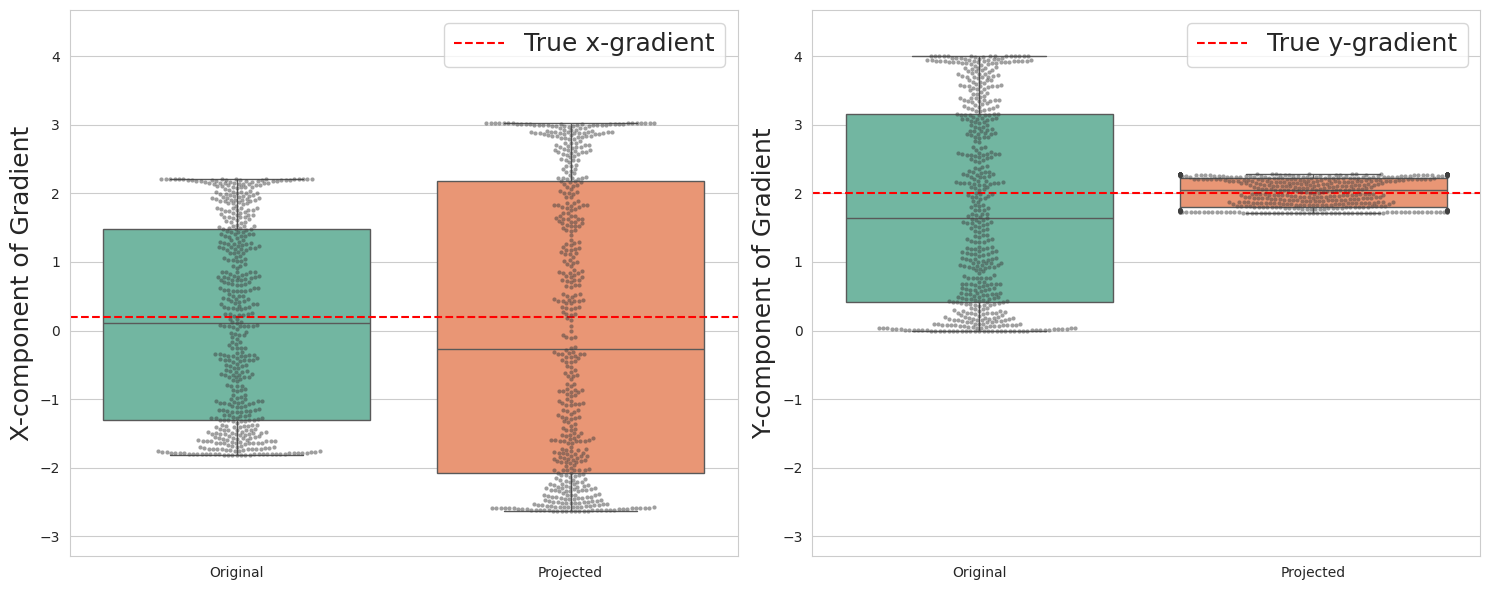

In [ ]:

plot_data(loaded_data)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 17.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 14.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


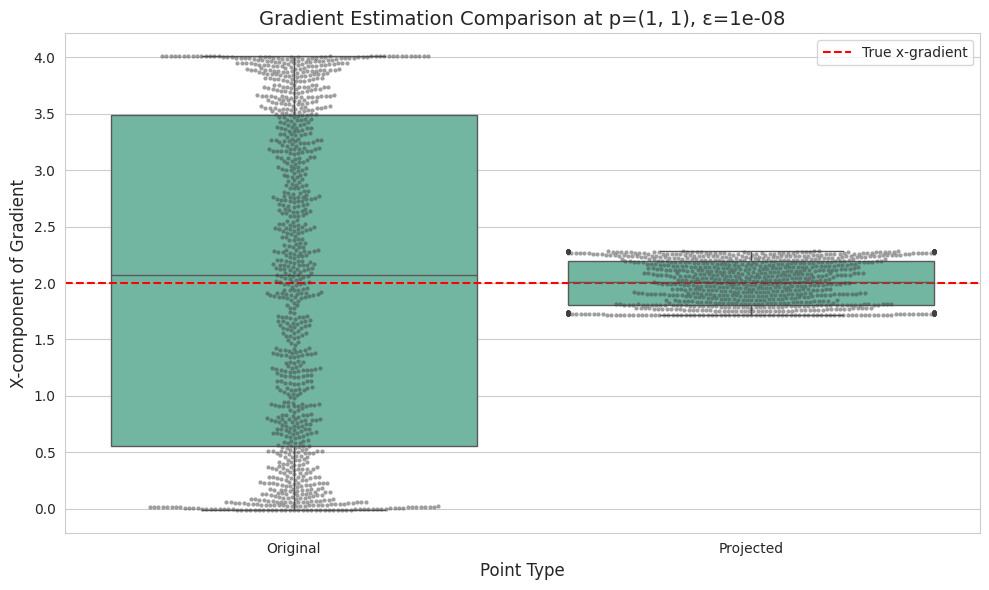

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def f(x, y):
    return 0.1*x**2 + y**2

def proj(x, a):
    n = len(a)
    a_norm_square = np.dot(a, a)
    ratio = a.dot(x) / a_norm_square
    drift = a / np.sqrt(a_norm_square)
    xi = np.random.choice([-1, 1])
    return x - ratio*a + xi * drift

def zeroth_order_gradient(p, u, epsilon):
    f_plus = f(*(p + epsilon * u))
    f_minus = f(*p)
    return (1 / epsilon) * (f_plus - f_minus) * u

# Set the point p and epsilon
p = np.array([1, 1])
epsilon = 1e-8  # Fixed epsilon value
a = np.array([0.2, 2])  # Vector a for projection

# Generate points
num_points = 1000
points = np.random.normal(size=(num_points, 2))
points = points / np.linalg.norm(points, axis=1)[:, np.newaxis] * np.sqrt(2)

# Project points
projected_points = np.array([proj(x, a) for x in points])

# Calculate gradient estimates
original_gradients = np.array([zeroth_order_gradient(p, u, epsilon) for u in points])
projected_gradients = np.array([zeroth_order_gradient(p, u, epsilon) for u in projected_points])

# Extract x-components of gradients
original_x_gradients = original_gradients[:, 1]
projected_x_gradients = projected_gradients[:, 1]

# Create a DataFrame for seaborn
df = pd.DataFrame({
    'Gradient': np.concatenate([original_x_gradients, projected_x_gradients]),
    'Type': ['Original']*num_points + ['Projected']*num_points
})

# Calculate the true gradient for comparison
true_gradient = np.array([2 * 0.01 * p[0], 2 * p[1]])

# Set up the plot style
sns.set_style("whitegrid")
sns.set_palette("Set2")

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Gradient', data=df)
sns.swarmplot(x='Type', y='Gradient', data=df, color=".25", size=3, alpha=0.5)

# Add a horizontal line for the true x-gradient
plt.axhline(y=true_gradient[1], color='r', linestyle='--', label='True x-gradient')

plt.title(f'Gradient Estimation Comparison at p=({p[0]}, {p[1]}), ε={epsilon}', fontsize=14)
plt.xlabel('Point Type', fontsize=12)
plt.ylabel('X-component of Gradient', fontsize=12)
plt.legend(fontsize=10)

plt.tight_layout()
plt.savefig('gradient_estimation_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

# Training Neural Network

In [ ]:
np.random.seed(0)

def f(x, y):
    return 0.01*x**2 + y**2

def proj(x, a):
    n = len(a)
    a_norm_square = np.dot(a, a)
    P = np.eye(n) - np.outer(a, a) / a_norm_square
    drift = a / np.sqrt(a_norm_square)
    xi = np.random.choice([-1, 1])
    return P.dot(x) + xi * drift

def zeroth_order_gradient_estimator(f, p, epsilon=1e-5, num_samples=1000, method='normalized'):
    dim = len(p)
    gradient_estimates = []
    a = np.array([2, 4])  # For the projected method

    for _ in range(num_samples):
        if method == 'normalized':
            u = np.random.normal(0, 1, dim)
            u = u / np.linalg.norm(u) * np.sqrt(dim)
        elif method == 'unnormalized':
            u = np.random.normal(0, 1, dim)
        elif method == 'projected':
            u = np.random.normal(0, 1, dim)
            u = proj(u, a)
        else:
            raise ValueError("Invalid method specified")

        f_plus = f(*(p + epsilon * u))
        f_minus = f(*p)

        gradient_estimate = (1 /  epsilon) * (f_plus - f_minus) * u
        gradient_estimates.append(gradient_estimate)

    return np.array(gradient_estimates)

a = zeroth_order_gradient_estimator(f, p=np.array([1,1]), num_samples=100)
np.sum(a, axis=0)/100

array([-0.00241952,  1.95598871])

In [ ]:
import numpy as np

def proj_multiple(num_vectors, a):
    n = len(a)
    a_norm_square = np.dot(a, a)
    P = np.eye(n) - np.outer(a, a) / a_norm_square
    drift = a / np.sqrt(a_norm_square)

    # Generate multiple x vectors
    X = np.random.normal(size=(num_vectors, n))

    # Generate multiple xi values
    xi = np.random.choice([-1, 1], size=num_vectors)

    # Apply projection to all vectors at once
    projected = X @ P.T + xi[:, np.newaxis] * drift

    return projected

# Example usage:
a = np.array([1, 2, 3])
num_vectors = 1000  # Number of vectors to generate
result = proj_multiple(num_vectors, a)

print(f"Shape of result: {result.shape}")
print("First few results:")
print(result[:5])

Shape of result: (1000, 3)
First few results:
[[ 1.26581861 -0.26664596  1.00304357]
 [ 0.64604519  0.81984879  0.48530487]
 [-0.46370883 -1.07169897 -0.37818354]
 [-0.67247696  0.75977699 -1.52957814]
 [ 0.63323219  0.34748335  0.80448616]]


In [ ]:

proj_multiple(1, a).flatten()

array([-2.44060782,  0.61651256, -0.84469156])

In [ ]:
import numpy as np

def generate_random_vector(a):
    n = len(a)
    a_norm = np.linalg.norm(a)

    # Step 1: Generate a random vector from the standard normal distribution
    w = np.random.randn(n)

    # Step 2: Project w onto the orthogonal complement of a
    P_a_perp = np.eye(n) - np.outer(a, a) / a_norm**2
    w_perp = P_a_perp @ w

    # Step 3: Normalize the orthogonal component
    w_perp /= np.linalg.norm(w_perp)

    # Step 4: Combine with a to satisfy the constraint
    V = w_perp + a / a_norm

    return V

# Example usage
a = np.array([1, 2, 3])
V = generate_random_vector(a)
print("Generated vector V:", V)
print("Covariance check (approx):", np.cov(np.array([generate_random_vector(a) for _ in range(10000)]).T))
print("Constraint check:", np.dot(a, V))
print("Norm of a:", np.linalg.norm(a))


Generated vector V: [-0.64695304  0.41215753  1.18809846]
Covariance check (approx): [[ 0.45850333 -0.06749203 -0.10783975]
 [-0.06749203  0.36037478 -0.21775251]
 [-0.10783975 -0.21775251  0.18111492]]
Constraint check: 3.7416573867739413
Norm of a: 3.7416573867739413


Epoch 0, Loss (Standard Gradient): 19.77077954241163, Loss (Zeroth-Order Gradient): 19.77077954241163
Epoch 100, Loss (Standard Gradient): 0.2686925858871762, Loss (Zeroth-Order Gradient): 0.2686925858841321
Epoch 200, Loss (Standard Gradient): 0.10281200768260824, Loss (Zeroth-Order Gradient): 0.10281200768175448
Epoch 300, Loss (Standard Gradient): 0.03345230606200673, Loss (Zeroth-Order Gradient): 0.03345230606104633
Epoch 400, Loss (Standard Gradient): 0.011630366909414054, Loss (Zeroth-Order Gradient): 0.011630366909031459
Epoch 500, Loss (Standard Gradient): 0.003915361511203223, Loss (Zeroth-Order Gradient): 0.003926171176241721
Epoch 600, Loss (Standard Gradient): 0.0013030095096208958, Loss (Zeroth-Order Gradient): 0.0013007993294782754
Epoch 700, Loss (Standard Gradient): 0.00042982417234154065, Loss (Zeroth-Order Gradient): 0.0004292088352819262
Epoch 800, Loss (Standard Gradient): 0.000140745715591046, Loss (Zeroth-Order Gradient): 0.0001410710609863829
Epoch 900, Loss (Sta

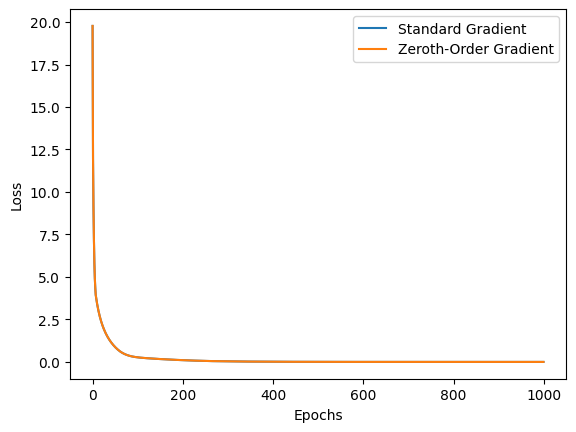

In [ ]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Define the neural network structure
input_size = 3  # Number of input features
hidden_size = 4  # Number of neurons in the hidden layer
output_size = 1  # Number of output neurons
learning_rate = 0.01
finite_diff_epsilon = 1e-5  # Perturbation size for finite differences

# Initialize weights and biases
W1_std = np.random.randn(input_size, hidden_size)
b1_std = np.zeros((1, hidden_size))
W2_std = np.random.randn(hidden_size, output_size)
b2_std = np.zeros((1, output_size))

W1_zo = W1_std.copy()
b1_zo = b1_std.copy()
W2_zo = W2_std.copy()
b2_zo = b2_std.copy()

# Activation function (ReLU) and its derivative
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

# Loss function (Mean Squared Error) and its derivative
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_loss_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_true.size

# Forward pass
def forward(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = Z2  # No activation function in the output layer for regression
    return A2, Z1, A1

# Zeroth-order gradient estimation for W1 and b1
def zeroth_order_gradient_estimation(X, y, y_pred, param, param_name):
    grad_est = np.zeros_like(param)
    original_param = param.copy()

    for i in range(param.shape[0]):
        for j in range(param.shape[1]):
            param[i, j] += finite_diff_epsilon
            y_pred_perturbed, _, _ = forward(X, W1_zo, b1_zo, W2_zo, b2_zo)
            loss_plus = mse_loss(y, y_pred_perturbed)

            param[i, j] -= 2 * finite_diff_epsilon
            y_pred_perturbed, _, _ = forward(X, W1_zo, b1_zo, W2_zo, b2_zo)
            loss_minus = mse_loss(y, y_pred_perturbed)

            grad_est[i, j] = (loss_plus - loss_minus) / (2 * finite_diff_epsilon)
            param[i, j] = original_param[i, j]

    return grad_est

# Backward pass with standard gradient for the first method
def backward_standard(X, y, y_pred, Z1, A1, Z2, A2):
    global W1_std, b1_std, W2_std, b2_std
    d_loss_y_pred = mse_loss_derivative(y, y_pred)

    d_loss_Z2 = d_loss_y_pred
    d_loss_W2 = np.dot(A1.T, d_loss_Z2)
    d_loss_b2 = np.sum(d_loss_Z2, axis=0, keepdims=True)

    d_loss_A1 = np.dot(d_loss_Z2, W2_std.T)
    d_loss_Z1 = d_loss_A1 * relu_derivative(Z1)
    d_loss_W1 = np.dot(X.T, d_loss_Z1)
    d_loss_b1 = np.sum(d_loss_Z1, axis=0, keepdims=True)

    # Update weights and biases
    W1_std -= learning_rate * d_loss_W1
    b1_std -= learning_rate * d_loss_b1
    W2_std -= learning_rate * d_loss_W2
    b2_std -= learning_rate * d_loss_b2

# Backward pass with zeroth-order gradient for the first layer for the second method
def backward_zeroth_order(X, y, y_pred, Z1, A1, Z2, A2):
    global W1_zo, b1_zo, W2_zo, b2_zo
    d_loss_y_pred = mse_loss_derivative(y, y_pred)

    d_loss_Z2 = d_loss_y_pred
    d_loss_W2 = np.dot(A1.T, d_loss_Z2)
    d_loss_b2 = np.sum(d_loss_Z2, axis=0, keepdims=True)

    d_loss_A1 = np.dot(d_loss_Z2, W2_zo.T)
    d_loss_Z1 = d_loss_A1 * relu_derivative(Z1)

    # Zeroth-order gradient estimation for W1 and b1
    d_loss_W1 = zeroth_order_gradient_estimation(X, y, y_pred, W1_zo, "W1")
    d_loss_b1 = zeroth_order_gradient_estimation(X, y, y_pred, b1_zo, "b1")

    # Update weights and biases
    W1_zo -= learning_rate * d_loss_W1
    b1_zo -= learning_rate * d_loss_b1
    W2_zo -= learning_rate * d_loss_W2
    b2_zo -= learning_rate * d_loss_b2

# Training the network
def train(X, y, epochs=1000):
    loss_std = []
    loss_zo = []
    for epoch in range(epochs):
        y_pred_std, Z1_std, A1_std = forward(X, W1_std, b1_std, W2_std, b2_std)
        loss_std.append(mse_loss(y, y_pred_std))
        backward_standard(X, y, y_pred_std, Z1_std, A1_std, Z1_std, y_pred_std)

        y_pred_zo, Z1_zo, A1_zo = forward(X, W1_zo, b1_zo, W2_zo, b2_zo)
        loss_zo.append(mse_loss(y, y_pred_zo))
        backward_zeroth_order(X, y, y_pred_zo, Z1_zo, A1_zo, Z1_zo, y_pred_zo)

        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss (Standard Gradient): {loss_std[-1]}, Loss (Zeroth-Order Gradient): {loss_zo[-1]}')

    return loss_std, loss_zo

# Example usage
X = np.array([[0.1, 0.2, 0.3],
              [0.4, 0.5, 0.6],
              [0.7, 0.8, 0.9]])
y = np.array([[1], [2], [3]])

loss_std, loss_zo = train(X, y, epochs=1000)

# Plot the results
import matplotlib.pyplot as plt

plt.plot(loss_std, label='Standard Gradient')
plt.plot(loss_zo, label='Zeroth-Order Gradient')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 0, Loss (Standard Gradient): 19.77077954241163, Loss (Zeroth-Order Gradient): 19.77077954241163
Epoch 100, Loss (Standard Gradient): 0.2686925858871762, Loss (Zeroth-Order Gradient): 0.139505336481657
Epoch 200, Loss (Standard Gradient): 0.10281200768260824, Loss (Zeroth-Order Gradient): 0.0699903063874521
Epoch 300, Loss (Standard Gradient): 0.03345230606200673, Loss (Zeroth-Order Gradient): 0.03536605162216837
Epoch 400, Loss (Standard Gradient): 0.011630366909414054, Loss (Zeroth-Order Gradient): 0.01784374455050675
Epoch 500, Loss (Standard Gradient): 0.003915361511203223, Loss (Zeroth-Order Gradient): 0.00900048238082431
Epoch 600, Loss (Standard Gradient): 0.0013030095096208958, Loss (Zeroth-Order Gradient): 0.004533580228483065
Epoch 700, Loss (Standard Gradient): 0.00042982417234154065, Loss (Zeroth-Order Gradient): 0.002281728807232931
Epoch 800, Loss (Standard Gradient): 0.000140745715591046, Loss (Zeroth-Order Gradient): 0.001146317257975425
Epoch 900, Loss (Standard G

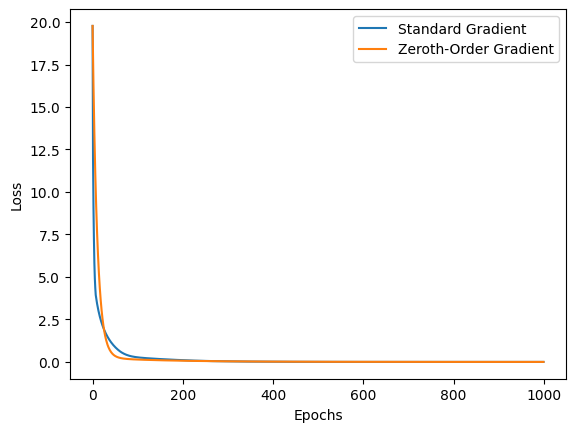

In [ ]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Define the neural network structure
input_size = 3  # Number of input features
hidden_size = 4  # Number of neurons in the hidden layer
output_size = 1  # Number of output neurons
learning_rate = 0.01
num_samples = 10  # Number of samples for Gaussian smoothing
sigma = 0.01  # Standard deviation for Gaussian noise

# Initialize weights and biases
W1_std = np.random.randn(input_size, hidden_size)
b1_std = np.zeros((1, hidden_size))
W2_std = np.random.randn(hidden_size, output_size)
b2_std = np.zeros((1, output_size))

W1_zo = W1_std.copy()
b1_zo = b1_std.copy()
W2_zo = W2_std.copy()
b2_zo = b2_std.copy()

# Activation function (ReLU) and its derivative
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

# Loss function (Mean Squared Error) and its derivative
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_loss_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_true.size

# Forward pass
def forward(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = Z2  # No activation function in the output layer for regression
    return A2, Z1, A1

# Zeroth-order gradient estimation using Gaussian smoothing
def zeroth_order_gradient_estimation(X, y, y_pred, param, param_name):
    grad_est = np.zeros_like(param)

    for _ in range(num_samples):
        noise = np.random.normal(0, sigma, param.shape)
        param_plus = param + noise
        param_minus = param # - noise

        if param_name == "W1":
            y_pred_plus, _, _ = forward(X, param_plus, b1_zo, W2_zo, b2_zo)
            y_pred_minus, _, _ = forward(X, param_minus, b1_zo, W2_zo, b2_zo)
        elif param_name == "b1":
            y_pred_plus, _, _ = forward(X, W1_zo, param_plus, W2_zo, b2_zo)
            y_pred_minus, _, _ = forward(X, W1_zo, param_minus, W2_zo, b2_zo)

        loss_plus = mse_loss(y, y_pred_plus)
        loss_minus = mse_loss(y, y_pred_minus)

        grad_est += (loss_plus - loss_minus) / (2 * sigma ) * noise

    grad_est /= num_samples

    return grad_est

# Backward pass with standard gradient for the first method
def backward_standard(X, y, y_pred, Z1, A1, Z2, A2):
    global W1_std, b1_std, W2_std, b2_std
    d_loss_y_pred = mse_loss_derivative(y, y_pred)

    d_loss_Z2 = d_loss_y_pred
    d_loss_W2 = np.dot(A1.T, d_loss_Z2)
    d_loss_b2 = np.sum(d_loss_Z2, axis=0, keepdims=True)

    d_loss_A1 = np.dot(d_loss_Z2, W2_std.T)
    d_loss_Z1 = d_loss_A1 * relu_derivative(Z1)
    d_loss_W1 = np.dot(X.T, d_loss_Z1)
    d_loss_b1 = np.sum(d_loss_Z1, axis=0, keepdims=True)

    # Update weights and biases
    W1_std -= learning_rate * d_loss_W1
    b1_std -= learning_rate * d_loss_b1
    W2_std -= learning_rate * d_loss_W2
    b2_std -= learning_rate * d_loss_b2

# Backward pass with zeroth-order gradient for the first layer for the second method
def backward_zeroth_order(X, y, y_pred, Z1, A1, Z2, A2):
    global W1_zo, b1_zo, W2_zo, b2_zo
    d_loss_y_pred = mse_loss_derivative(y, y_pred)

    d_loss_Z2 = d_loss_y_pred
    d_loss_W2 = np.dot(A1.T, d_loss_Z2)
    d_loss_b2 = np.sum(d_loss_Z2, axis=0, keepdims=True)

    d_loss_A1 = np.dot(d_loss_Z2, W2_zo.T)
    d_loss_Z1 = d_loss_A1 * relu_derivative(Z1)

    # Zeroth-order gradient estimation for W1 and b1
    d_loss_W1 = zeroth_order_gradient_estimation(X, y, y_pred, W1_zo, "W1")
    d_loss_b1 = zeroth_order_gradient_estimation(X, y, y_pred, b1_zo, "b1")

    # Update weights and biases
    W1_zo -= learning_rate * d_loss_W1
    b1_zo -= learning_rate * d_loss_b1
    W2_zo -= learning_rate * d_loss_W2
    b2_zo -= learning_rate * d_loss_b2

# Training the network
def train(X, y, epochs=1000):
    loss_std = []
    loss_zo = []
    for epoch in range(epochs):
        y_pred_std, Z1_std, A1_std = forward(X, W1_std, b1_std, W2_std, b2_std)
        loss_std.append(mse_loss(y, y_pred_std))
        backward_standard(X, y, y_pred_std, Z1_std, A1_std, Z1_std, y_pred_std)

        y_pred_zo, Z1_zo, A1_zo = forward(X, W1_zo, b1_zo, W2_zo, b2_zo)
        loss_zo.append(mse_loss(y, y_pred_zo))
        backward_zeroth_order(X, y, y_pred_zo, Z1_zo, A1_zo, Z1_zo, y_pred_zo)

        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss (Standard Gradient): {loss_std[-1]}, Loss (Zeroth-Order Gradient): {loss_zo[-1]}')

    return loss_std, loss_zo

# Example usage
X = np.array([[0.1, 0.2, 0.3],
              [0.4, 0.5, 0.6],
              [0.7, 0.8, 0.9]])
y = np.array([[1], [2], [3]])

loss_std, loss_zo = train(X, y, epochs=1000)

# Plot the results
import matplotlib.pyplot as plt

plt.plot(loss_std, label='Standard Gradient')
plt.plot(loss_zo, label='Zeroth-Order Gradient')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 0, Loss (Standard Gradient): 21.009570288347785, Loss (Zeroth-Order Gradient): 21.009570288347785
Epoch 100, Loss (Standard Gradient): 7.159037569999685, Loss (Zeroth-Order Gradient): 8.42786815866371
Epoch 200, Loss (Standard Gradient): 2.9345606857225817, Loss (Zeroth-Order Gradient): 3.6264080209855076
Epoch 300, Loss (Standard Gradient): 1.4352508004013191, Loss (Zeroth-Order Gradient): 1.7885778321379597
Epoch 400, Loss (Standard Gradient): 0.8703291359123536, Loss (Zeroth-Order Gradient): 1.084116857901201
Epoch 500, Loss (Standard Gradient): 0.6510745236904173, Loss (Zeroth-Order Gradient): 0.8128045588354299
Epoch 600, Loss (Standard Gradient): 0.5629981926410045, Loss (Zeroth-Order Gradient): 0.7072244871225503
Epoch 700, Loss (Standard Gradient): 0.5250880184592234, Loss (Zeroth-Order Gradient): 0.6649992147770324
Epoch 800, Loss (Standard Gradient): 0.5064153689860781, Loss (Zeroth-Order Gradient): 0.6470348001544884
Epoch 900, Loss (Standard Gradient): 0.4951457923360

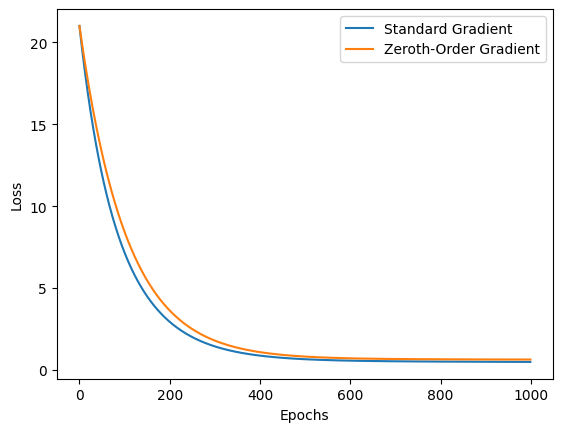

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Define the neural network structure
input_size = 3  # Number of input features
hidden_size = 4  # Number of neurons in the hidden layer
output_size = 1  # Number of output neurons
learning_rate = 0.001
num_samples = 1   # Number of samples for Gaussian smoothing
sigma = 0.01  # Standard deviation for Gaussian noise

# Initialize weights and biases
W1_std = np.random.randn(input_size, hidden_size)
b1_std = np.zeros((1, hidden_size))
W2_std = np.random.randn(hidden_size, output_size)
b2_std = np.zeros((1, output_size))

W1_zo = W1_std.copy()
b1_zo = b1_std.copy()
W2_zo = W2_std.copy()
b2_zo = b2_std.copy()

# Activation functions and their derivatives
def activation_layer(x, activation_type):
    if activation_type == "tanh":
        return np.tanh(x)
    elif activation_type == "sigmoid":
        return 1 / (1 + np.exp(-x))
    elif activation_type == "softplus":
        return np.log(1 + np.exp(x))
    else:
        raise ValueError(f"Unsupported activation type: {activation_type}")

def activation_layer_derivative(x, activation_type):
    if activation_type == "tanh":
        return 1 - np.tanh(x)**2
    elif activation_type == "sigmoid":
        sig = 1 / (1 + np.exp(-x))
        return sig * (1 - sig)
    elif activation_type == "softplus":
        return 1 / (1 + np.exp(-x))
    else:
        raise ValueError(f"Unsupported activation type: {activation_type}")

# Loss function (Mean Squared Error) and its derivative
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_loss_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_true.size

# Forward pass
def forward(X, W1, b1, W2, b2, activation_type):
    Z1 = np.dot(X, W1) + b1
    A1 = activation_layer(Z1, activation_type)
    Z2 = np.dot(A1, W2) + b2
    A2 = Z2  # No activation function in the output layer for regression
    return A2, Z1, A1

# Zeroth-order gradient estimation using Gaussian smoothing
def zeroth_order_gradient_estimation(X, y, y_pred, param, param_name, activation_type):
    grad_est = np.zeros_like(param)

    for _ in range(num_samples):
        noise = np.random.normal(0, sigma, param.shape)
        param_plus = param + noise
        param_minus = param - noise

        if param_name == "W1":
            y_pred_plus, _, _ = forward(X, param_plus, b1_zo, W2_zo, b2_zo, activation_type)
            y_pred_minus, _, _ = forward(X, param_minus, b1_zo, W2_zo, b2_zo, activation_type)
        elif param_name == "b1":
            y_pred_plus, _, _ = forward(X, W1_zo, param_plus, W2_zo, b2_zo, activation_type)
            y_pred_minus, _, _ = forward(X, W1_zo, param_minus, W2_zo, b2_zo, activation_type)

        loss_plus = mse_loss(y, y_pred_plus)
        loss_minus = mse_loss(y, y_pred_minus)

        grad_est += (loss_plus - loss_minus) / (2 * sigma) * noise

    grad_est /= num_samples

    return grad_est

# Backward pass with standard gradient for the first method
def backward_standard(X, y, y_pred, Z1, A1, Z2, A2, activation_type):
    global W1_std, b1_std, W2_std, b2_std
    d_loss_y_pred = mse_loss_derivative(y, y_pred)

    d_loss_Z2 = d_loss_y_pred
    d_loss_W2 = np.dot(A1.T, d_loss_Z2)
    d_loss_b2 = np.sum(d_loss_Z2, axis=0, keepdims=True)

    d_loss_A1 = np.dot(d_loss_Z2, W2_std.T)
    d_loss_Z1 = d_loss_A1 * activation_layer_derivative(Z1, activation_type)
    d_loss_W1 = np.dot(X.T, d_loss_Z1)
    d_loss_b1 = np.sum(d_loss_Z1, axis=0, keepdims=True)

    # Update weights and biases
    W1_std -= learning_rate * d_loss_W1
    b1_std -= learning_rate * d_loss_b1
    W2_std -= learning_rate * d_loss_W2
    b2_std -= learning_rate * d_loss_b2

# Backward pass with zeroth-order gradient for the first layer for the second method
def backward_zeroth_order(X, y, y_pred, Z1, A1, Z2, A2, activation_type):
    global W1_zo, b1_zo, W2_zo, b2_zo
    d_loss_y_pred = mse_loss_derivative(y, y_pred)

    d_loss_Z2 = d_loss_y_pred
    d_loss_W2 = np.dot(A1.T, d_loss_Z2)
    d_loss_b2 = np.sum(d_loss_Z2, axis=0, keepdims=True)

    d_loss_A1 = np.dot(d_loss_Z2, W2_zo.T)
    d_loss_Z1 = d_loss_A1 * activation_layer_derivative(Z1, activation_type)

    # Zeroth-order gradient estimation for W1 and b1
    d_loss_W1 = zeroth_order_gradient_estimation(X, y, y_pred, W1_zo, "W1", activation_type)
    d_loss_b1 = zeroth_order_gradient_estimation(X, y, y_pred, b1_zo, "b1", activation_type)

    # Update weights and biases
    W1_zo -= learning_rate * d_loss_W1
    b1_zo -= learning_rate * d_loss_b1
    W2_zo -= learning_rate * d_loss_W2
    b2_zo -= learning_rate * d_loss_b2

# Training the network
def train(X, y, epochs=1000, activation_type="tanh"):
    loss_std = []
    loss_zo = []
    for epoch in range(epochs):
        y_pred_std, Z1_std, A1_std = forward(X, W1_std, b1_std, W2_std, b2_std, activation_type)
        loss_std.append(mse_loss(y, y_pred_std))
        backward_standard(X, y, y_pred_std, Z1_std, A1_std, Z1_std, y_pred_std, activation_type)

        y_pred_zo, Z1_zo, A1_zo = forward(X, W1_zo, b1_zo, W2_zo, b2_zo, activation_type)
        loss_zo.append(mse_loss(y, y_pred_zo))
        backward_zeroth_order(X, y, y_pred_zo, Z1_zo, A1_zo, Z1_zo, y_pred_zo, activation_type)

        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss (Standard Gradient): {loss_std[-1]}, Loss (Zeroth-Order Gradient): {loss_zo[-1]}')

    return loss_std, loss_zo

# Example usage
X = np.array([[0.1, 0.2, 0.3],
              [0.4, 0.5, 0.6],
              [0.7, 0.8, 0.9]])
y = np.array([[1], [2], [3]])

loss_std, loss_zo = train(X, y, epochs=1000, activation_type="sigmoid")

# Plot the results
plt.plot(loss_std, label='Standard Gradient')
plt.plot(loss_zo, label='Zeroth-Order Gradient')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 0, Loss (Standard Gradient): 5.823269418416677, Loss (Zeroth-Order Gradient): 5.823269418416677
Epoch 100, Loss (Standard Gradient): 0.679488005410674, Loss (Zeroth-Order Gradient): 0.9664540138403894
Epoch 200, Loss (Standard Gradient): 0.41085573775945683, Loss (Zeroth-Order Gradient): 0.564433964273707
Epoch 300, Loss (Standard Gradient): 0.3597202771203408, Loss (Zeroth-Order Gradient): 0.5146846312602826
Epoch 400, Loss (Standard Gradient): 0.3246366767137028, Loss (Zeroth-Order Gradient): 0.4937376539349655


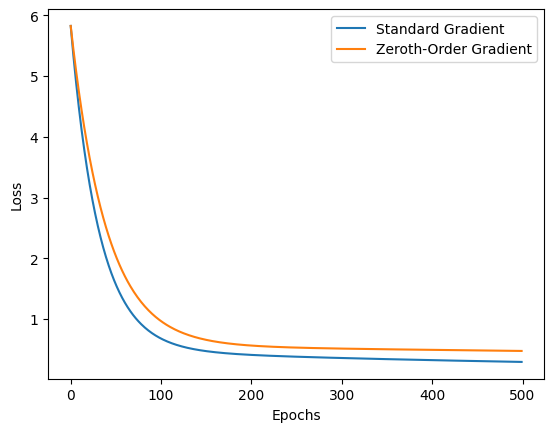

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Define the neural network structure
input_size = 10  # Number of input features
hidden_size = 20  # Number of neurons in the hidden layer
output_size = 1  # Number of output neurons
learning_rate = 0.001
num_samples = 5  # Number of samples for Gaussian smoothing
sigma = 0.01  # Standard deviation for Gaussian noise

# Initialize weights and biases
W1_std = np.random.randn(input_size, hidden_size)
b1_std = np.zeros((1, hidden_size))
W2_std = np.random.randn(hidden_size, output_size)
b2_std = np.zeros((1, output_size))

W1_zo = W1_std.copy()
b1_zo = b1_std.copy()
W2_zo = W2_std.copy()
b2_zo = b2_std.copy()

# Activation functions and their derivatives
def activation_layer(x, activation_type):
    if activation_type == "tanh":
        return np.tanh(x)
    elif activation_type == "sigmoid":
        return 1 / (1 + np.exp(-x))
    elif activation_type == "softplus":
        return np.log(1 + np.exp(x))
    else:
        raise ValueError(f"Unsupported activation type: {activation_type}")

def activation_layer_derivative(x, activation_type):
    if activation_type == "tanh":
        return 1 - np.tanh(x)**2
    elif activation_type == "sigmoid":
        sig = 1 / (1 + np.exp(-x))
        return sig * (1 - sig)
    elif activation_type == "softplus":
        return 1 / (1 + np.exp(-x))
    else:
        raise ValueError(f"Unsupported activation type: {activation_type}")

# Loss function (Mean Squared Error) and its derivative
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_loss_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_true.size

# Forward pass
def forward(X, W1, b1, W2, b2, activation_type):
    # print(X.shape) #b,10
    # print(W1.shape) #10,20
    Z1 = np.dot(X, W1) + b1
    A1 = activation_layer(Z1, activation_type)
    # print(A1.shape) #b,20
    Z2 = np.dot(A1, W2) + b2
    A2 = Z2  # No activation function in the output layer for regression
    return A2, Z1, A1

# Zeroth-order gradient estimation using Gaussian smoothing
def zeroth_order_gradient_estimation(X, y, y_pred, param, param_name, activation_type):
    grad_est = np.zeros_like(param)
    est_partial = 0

    for _ in range(num_samples):
        noise = np.random.normal(0, sigma, param.shape)
        param_plus = param + noise
        param_minus = param - noise

        if param_name == "W1":
            y_pred_plus, _, A1_plus = forward(X, param_plus, b1_zo, W2_zo, b2_zo, activation_type)
            y_pred_minus, _, A1_minus = forward(X, param_minus, b1_zo, W2_zo, b2_zo, activation_type)
        elif param_name == "b1":
            y_pred_plus, _, A1_plus = forward(X, W1_zo, param_plus, W2_zo, b2_zo, activation_type)
            y_pred_minus, _, A1_minus = forward(X, W1_zo, param_minus, W2_zo, b2_zo, activation_type)

        # loss_plus = mse_loss(y, y_pred_plus)
        # loss_minus = mse_loss(y, y_pred_minus)
        # grad_est += (loss_plus - loss_minus) / (2 * sigma) * noise
        # print(A1_plus.shape) # (b,20)
        # print(noise.shape) # (10,20)
        est_partial += np.einsum("ij,mn->ijmn", (A1_plus - A1_minus) / (2 * sigma), noise)
        # print(est_partial.shape) # (13, 20, 10, 20)

    est_partial /= num_samples
    # print("*************************")
    # print(est_partial.shape)  # (13, 20, 10, 20)
    # print(W2_zo.shape) # (20,1)

    broadcasted_array = np.broadcast_to(W2_zo.T, (13, 20))
    # print(broadcasted_array.shape) # (13,20)
    # print("*************************")
    # grad_est = np.dot(W2_zo, est_partial)
    grad = np.einsum("ij,ijmn->mn", broadcasted_array, est_partial)
    # grad_est /= num_samples
    return grad_est


# Zeroth-order gradient estimation using Gaussian smoothing
def zeroth_order_gradient_estimation(X, y, y_pred, param, param_name, activation_type):
    grad_est = np.zeros_like(param)

    for _ in range(num_samples):
        noise = np.random.normal(0, sigma, param.shape)
        param_plus = param + noise
        param_minus = param - noise

        if param_name == "W1":
            y_pred_plus, _, _ = forward(X, param_plus, b1_zo, W2_zo, b2_zo, activation_type)
            y_pred_minus, _, _ = forward(X, param_minus, b1_zo, W2_zo, b2_zo, activation_type)
        elif param_name == "b1":
            y_pred_plus, _, _ = forward(X, W1_zo, param_plus, W2_zo, b2_zo, activation_type)
            y_pred_minus, _, _ = forward(X, W1_zo, param_minus, W2_zo, b2_zo, activation_type)

        loss_plus = mse_loss(y, y_pred_plus)
        loss_minus = mse_loss(y, y_pred_minus)

        grad_est += (loss_plus - loss_minus) / (2 * sigma) * noise

    grad_est /= num_samples

    return grad_est

# Backward pass with standard gradient for the first method
def backward_standard(X, y, y_pred, Z1, A1, Z2, A2, activation_type):
    global W1_std, b1_std, W2_std, b2_std
    d_loss_y_pred = mse_loss_derivative(y, y_pred)

    d_loss_Z2 = d_loss_y_pred
    d_loss_W2 = np.dot(A1.T, d_loss_Z2)
    d_loss_b2 = np.sum(d_loss_Z2, axis=0, keepdims=True)

    d_loss_A1 = np.dot(d_loss_Z2, W2_std.T)
    d_loss_Z1 = d_loss_A1 * activation_layer_derivative(Z1, activation_type)
    d_loss_W1 = np.dot(X.T, d_loss_Z1)
    d_loss_b1 = np.sum(d_loss_Z1, axis=0, keepdims=True)

    # Update weights and biases
    W1_std -= learning_rate * d_loss_W1
    b1_std -= learning_rate * d_loss_b1
    W2_std -= learning_rate * d_loss_W2
    b2_std -= learning_rate * d_loss_b2

# Backward pass with zeroth-order gradient for the first layer for the second method
def backward_zeroth_order(X, y, y_pred, Z1, A1, Z2, A2, activation_type):
    global W1_zo, b1_zo, W2_zo, b2_zo
    d_loss_y_pred = mse_loss_derivative(y, y_pred)

    d_loss_Z2 = d_loss_y_pred
    d_loss_W2 = np.dot(A1.T, d_loss_Z2)
    d_loss_b2 = np.sum(d_loss_Z2, axis=0, keepdims=True)

    d_loss_A1 = np.dot(d_loss_Z2, W2_zo.T)
    d_loss_Z1 = d_loss_A1 * activation_layer_derivative(Z1, activation_type)

    # Zeroth-order gradient estimation for W1 and b1
    d_loss_W1 = zeroth_order_gradient_estimation(X, y, y_pred, W1_zo, "W1", activation_type)
    d_loss_b1 = zeroth_order_gradient_estimation(X, y, y_pred, b1_zo, "b1", activation_type)

    # Update weights and biases
    W1_zo -= learning_rate * d_loss_W1
    b1_zo -= learning_rate * d_loss_b1
    W2_zo -= learning_rate * d_loss_W2
    b2_zo -= learning_rate * d_loss_b2

# Training the network
def train(X, y, epochs=1000, activation_type="tanh"):
    loss_std = []
    loss_zo = []
    for epoch in range(epochs):
        y_pred_std, Z1_std, A1_std = forward(X, W1_std, b1_std, W2_std, b2_std, activation_type)
        loss_std.append(mse_loss(y, y_pred_std))
        backward_standard(X, y, y_pred_std, Z1_std, A1_std, Z1_std, y_pred_std, activation_type)

        y_pred_zo, Z1_zo, A1_zo = forward(X, W1_zo, b1_zo, W2_zo, b2_zo, activation_type)
        loss_zo.append(mse_loss(y, y_pred_zo))
        backward_zeroth_order(X, y, y_pred_zo, Z1_zo, A1_zo, Z1_zo, y_pred_zo, activation_type)

        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss (Standard Gradient): {loss_std[-1]}, Loss (Zeroth-Order Gradient): {loss_zo[-1]}')

    return loss_std, loss_zo

# Example usage with larger data
X = np.random.rand(13, input_size)
y = np.random.rand(13, output_size)

loss_std, loss_zo = train(X, y, epochs=500, activation_type="sigmoid")

# Plot the results
plt.plot(loss_std, label='Standard Gradient')
plt.plot(loss_zo, label='Zeroth-Order Gradient')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 0, Loss (Standard Gradient): 5.823269418416677, Loss (Zeroth-Order Gradient v1): 5.823269418416677, Loss (Zeroth-Order Gradient v2): 5.823269418416677
Epoch 100, Loss (Standard Gradient): 0.679488005410674, Loss (Zeroth-Order Gradient v1): 0.8838596350884872, Loss (Zeroth-Order Gradient v2): 0.9509140439343242
Epoch 200, Loss (Standard Gradient): 0.41085573775945683, Loss (Zeroth-Order Gradient v1): 0.5135454238390974, Loss (Zeroth-Order Gradient v2): 0.5558647785043174
Epoch 300, Loss (Standard Gradient): 0.3597202771203408, Loss (Zeroth-Order Gradient v1): 0.4702702248331001, Loss (Zeroth-Order Gradient v2): 0.5058515989489755
Epoch 400, Loss (Standard Gradient): 0.3246366767137028, Loss (Zeroth-Order Gradient v1): 0.445287529449189, Loss (Zeroth-Order Gradient v2): 0.48356605884584974


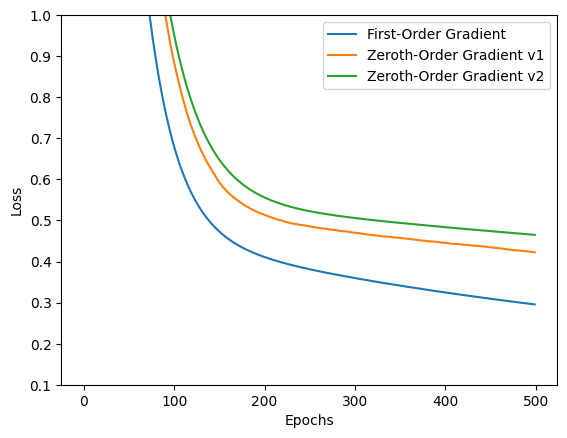

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Define the neural network structure
input_size = 10  # Number of input features
hidden_size = 20  # Number of neurons in the hidden layer
output_size = 1  # Number of output neurons
learning_rate = 0.001
num_samples = 10  # Number of samples for Gaussian smoothing
sigma = 0.1  # Standard deviation for Gaussian noise

# Initialize weights and biases
W1_std = np.random.randn(input_size, hidden_size)
b1_std = np.zeros((1, hidden_size))
W2_std = np.random.randn(hidden_size, output_size)
b2_std = np.zeros((1, output_size))

W1_zo = W1_std.copy()
b1_zo = b1_std.copy()
W2_zo = W2_std.copy()
b2_zo = b2_std.copy()

W1_zo_v2 = W1_std.copy()
b1_zo_v2 = b1_std.copy()
W2_zo_v2 = W2_std.copy()
b2_zo_v2 = b2_std.copy()


# Activation functions and their derivatives
def activation_layer(x, activation_type):
    if activation_type == "tanh":
        return np.tanh(x)
    elif activation_type == "sigmoid":
        return 1 / (1 + np.exp(-x))
    elif activation_type == "softplus":
        return np.log(1 + np.exp(x))
    else:
        raise ValueError(f"Unsupported activation type: {activation_type}")

def activation_layer_derivative(x, activation_type):
    if activation_type == "tanh":
        return 1 - np.tanh(x)**2
    elif activation_type == "sigmoid":
        sig = 1 / (1 + np.exp(-x))
        return sig * (1 - sig)
    elif activation_type == "softplus":
        return 1 / (1 + np.exp(-x))
    else:
        raise ValueError(f"Unsupported activation type: {activation_type}")

# Loss function (Mean Squared Error) and its derivative
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_loss_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_true.size

# Forward pass
def forward(X, W1, b1, W2, b2, activation_type):
    # print(X.shape) #b,10
    # print(W1.shape) #10,20
    Z1 = np.dot(X, W1) + b1
    A1 = activation_layer(Z1, activation_type)
    # print(A1.shape) #b,20
    Z2 = np.dot(A1, W2) + b2
    A2 = Z2  # No activation function in the output layer for regression
    return A2, Z1, A1

def zeroth_order_gradient_estimation_v1(X, y, y_pred, param, param_name, activation_type):
    grad_est = np.zeros_like(param)
    est_partial = 0

    for _ in range(num_samples):
        noise = np.random.normal(0, sigma, param.shape)
        param_plus = param + noise
        param_minus = param

        if param_name == "W1":
            y_pred_plus, _, A1_plus = forward(X, param_plus, b1_zo, W2_zo, b2_zo, activation_type)
            y_pred_minus, _, A1_minus = forward(X, param_minus, b1_zo, W2_zo, b2_zo, activation_type)
        elif param_name == "b1":
            y_pred_plus, _, A1_plus = forward(X, W1_zo, param_plus, W2_zo, b2_zo, activation_type)
            y_pred_minus, _, A1_minus = forward(X, W1_zo, param_minus, W2_zo, b2_zo, activation_type)

        est_partial += np.einsum("ij,mn->ijmn", (A1_plus - A1_minus) / (2 * sigma), noise)

    est_partial /= num_samples

    broadcasted_array = np.broadcast_to(W2_zo.T, (13, hidden_size))

    coef = 2* (y_pred_minus - y).reshape(-1)
    #print(coef.shape)   # 13
    #print(broadcasted_array.shape)  # 13,hidden_size
    pgrad = np.einsum("m,mn->mn", coef, broadcasted_array)
    #print(pgrad.shape) #13,20
    #print(est_partial.shape)  #  13, hidden_size, 10, hidden_size
    grad_est = np.einsum("ij,ijmn->mn", broadcasted_array, est_partial)
    #print(grad_est.shape)
    #raise
    return grad_est

def zeroth_order_gradient_estimation_v2(X, y, y_pred, param, param_name, activation_type):
    grad_est = np.zeros_like(param)

    for _ in range(num_samples):
        noise = np.random.normal(0, sigma, param.shape)
        param_plus = param + noise
        param_minus = param

        if param_name == "W1":
            y_pred_plus, _, _ = forward(X, param_plus, b1_zo, W2_zo, b2_zo, activation_type)
            y_pred_minus, _, _ = forward(X, param_minus, b1_zo, W2_zo, b2_zo, activation_type)
        elif param_name == "b1":
            y_pred_plus, _, _ = forward(X, W1_zo, param_plus, W2_zo, b2_zo, activation_type)
            y_pred_minus, _, _ = forward(X, W1_zo, param_minus, W2_zo, b2_zo, activation_type)

        loss_plus = mse_loss(y, y_pred_plus)
        loss_minus = mse_loss(y, y_pred_minus)

        grad_est += (loss_plus - loss_minus) / (2 * sigma) * noise

    grad_est /= num_samples

    return grad_est


# Backward pass with standard gradient for the first method
def backward_standard(X, y, y_pred, Z1, A1, Z2, A2, activation_type):
    global W1_std, b1_std, W2_std, b2_std
    d_loss_y_pred = mse_loss_derivative(y, y_pred)

    d_loss_Z2 = d_loss_y_pred
    d_loss_W2 = np.dot(A1.T, d_loss_Z2)
    d_loss_b2 = np.sum(d_loss_Z2, axis=0, keepdims=True)

    d_loss_A1 = np.dot(d_loss_Z2, W2_std.T)
    d_loss_Z1 = d_loss_A1 * activation_layer_derivative(Z1, activation_type)
    d_loss_W1 = np.dot(X.T, d_loss_Z1)
    d_loss_b1 = np.sum(d_loss_Z1, axis=0, keepdims=True)

    # Update weights and biases
    W1_std -= learning_rate * d_loss_W1
    b1_std -= learning_rate * d_loss_b1
    W2_std -= learning_rate * d_loss_W2
    b2_std -= learning_rate * d_loss_b2

# Backward pass with zeroth-order gradient for the first layer for the second method (v1)
def backward_zeroth_order_v1(X, y, y_pred, Z1, A1, Z2, A2, activation_type):
    global W1_zo, b1_zo, W2_zo, b2_zo
    d_loss_y_pred = mse_loss_derivative(y, y_pred)

    d_loss_Z2 = d_loss_y_pred
    d_loss_W2 = np.dot(A1.T, d_loss_Z2)
    d_loss_b2 = np.sum(d_loss_Z2, axis=0, keepdims=True)

    d_loss_A1 = np.dot(d_loss_Z2, W2_zo.T)
    d_loss_Z1 = d_loss_A1 * activation_layer_derivative(Z1, activation_type)

    # Zeroth-order gradient estimation for W1 and b1 using v1
    d_loss_W1 = zeroth_order_gradient_estimation_v1(X, y, y_pred, W1_zo, "W1", activation_type)
    d_loss_b1 = zeroth_order_gradient_estimation_v1(X, y, y_pred, b1_zo, "b1", activation_type)

    # Update weights and biases
    W1_zo -= learning_rate * d_loss_W1
    b1_zo -= learning_rate * d_loss_b1
    W2_zo -= learning_rate * d_loss_W2
    b2_zo -= learning_rate * d_loss_b2

# Backward pass with zeroth-order gradient for the first layer for the second method (v2)
def backward_zeroth_order_v2(X, y, y_pred, Z1, A1, Z2, A2, activation_type):
    global W1_zo_v2, b1_zo_v2, W2_zo_v2, b2_zo_v2
    d_loss_y_pred = mse_loss_derivative(y, y_pred)

    d_loss_Z2 = d_loss_y_pred
    d_loss_W2 = np.dot(A1.T, d_loss_Z2)
    d_loss_b2 = np.sum(d_loss_Z2, axis=0, keepdims=True)

    d_loss_A1 = np.dot(d_loss_Z2, W2_zo_v2.T)
    d_loss_Z1 = d_loss_A1 * activation_layer_derivative(Z1, activation_type)

    # Zeroth-order gradient estimation for W1 and b1 using v2
    d_loss_W1 = zeroth_order_gradient_estimation_v2(X, y, y_pred, W1_zo_v2, "W1", activation_type)
    d_loss_b1 = zeroth_order_gradient_estimation_v2(X, y, y_pred, b1_zo_v2, "b1", activation_type)

    # Update weights and biases
    W1_zo_v2 -= learning_rate * d_loss_W1
    b1_zo_v2 -= learning_rate * d_loss_b1
    W2_zo_v2 -= learning_rate * d_loss_W2
    b2_zo_v2 -= learning_rate * d_loss_b2

# Training the network
def train(X, y, epochs=1000, activation_type="tanh"):
    loss_std = []
    loss_zo_v1 = []
    loss_zo_v2 = []

    for epoch in range(epochs):
        y_pred_std, Z1_std, A1_std = forward(X, W1_std, b1_std, W2_std, b2_std, activation_type)
        loss_std.append(mse_loss(y, y_pred_std))
        backward_standard(X, y, y_pred_std, Z1_std, A1_std, Z1_std, y_pred_std, activation_type)

        y_pred_zo_v1, Z1_zo, A1_zo = forward(X, W1_zo, b1_zo, W2_zo, b2_zo, activation_type)
        loss_zo_v1.append(mse_loss(y, y_pred_zo_v1))
        backward_zeroth_order_v1(X, y, y_pred_zo_v1, Z1_zo, A1_zo, Z1_zo, y_pred_zo_v1, activation_type)

        y_pred_zo_v2, Z1_zo_v2, A1_zo_v2 = forward(X, W1_zo_v2, b1_zo_v2, W2_zo_v2, b2_zo_v2, activation_type)
        loss_zo_v2.append(mse_loss(y, y_pred_zo_v2))
        backward_zeroth_order_v2(X, y, y_pred_zo_v2, Z1_zo_v2, A1_zo_v2, Z1_zo_v2, y_pred_zo_v2, activation_type)

        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss (Standard Gradient): {loss_std[-1]}, Loss (Zeroth-Order Gradient v1): {loss_zo_v1[-1]}, Loss (Zeroth-Order Gradient v2): {loss_zo_v2[-1]}')

    return loss_std, loss_zo_v1, loss_zo_v2

X = np.random.rand(13, input_size)
y = np.random.rand(13, output_size)

loss_std, loss_zo_v1, loss_zo_v2 = train(X, y, epochs=500, activation_type="sigmoid")

# Plot the results
plt.plot(loss_std, label='First-Order Gradient')
plt.plot(loss_zo_v1, label='Zeroth-Order Gradient v1')
plt.plot(loss_zo_v2, label='Zeroth-Order Gradient v2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0.1,1)
plt.legend()
plt.show()



Epoch 0, Loss (Standard Gradient): 5.547044419978325, Loss (Zeroth-Order Gradient v1): 5.547044419978325, Loss (Zeroth-Order Gradient v2): 5.547044419978325
Epoch 100, Loss (Standard Gradient): 0.4146512186407602, Loss (Zeroth-Order Gradient v1): 0.4630225252961371, Loss (Zeroth-Order Gradient v2): 0.5238486690118316
Epoch 200, Loss (Standard Gradient): 0.38142262552076034, Loss (Zeroth-Order Gradient v1): 0.4361220831420614, Loss (Zeroth-Order Gradient v2): 0.4417181501328112
Epoch 300, Loss (Standard Gradient): 0.36061554455712475, Loss (Zeroth-Order Gradient v1): 0.4315932127200145, Loss (Zeroth-Order Gradient v2): 0.4332300268047972
Epoch 400, Loss (Standard Gradient): 0.34148447845915914, Loss (Zeroth-Order Gradient v1): 0.41778266863131314, Loss (Zeroth-Order Gradient v2): 0.42551322820754933


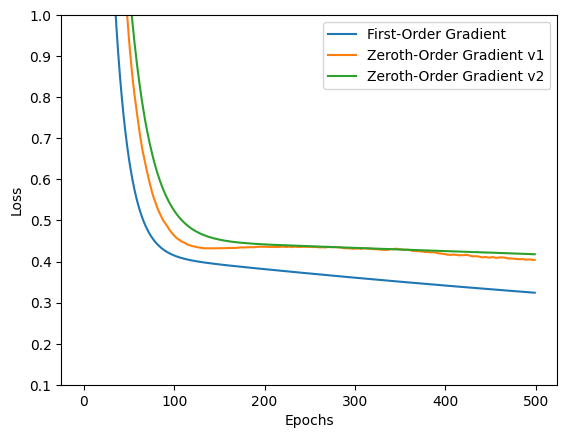

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
# np.random.seed(42)

# Define the neural network structure
input_size = 10  # Number of input features
hidden_size = 20  # Number of neurons in the hidden layer
output_size = 1  # Number of output neurons
learning_rate = 0.001
num_samples = 10  # Number of samples for Gaussian smoothing
sigma = 0.1  # Standard deviation for Gaussian noise

# Initialize weights and biases
W1_std = np.random.randn(input_size, hidden_size)
b1_std = np.zeros((1, hidden_size))
W2_std = np.random.randn(hidden_size, output_size)
b2_std = np.zeros((1, output_size))

W1_zo = W1_std.copy()
b1_zo = b1_std.copy()
W2_zo = W2_std.copy()
b2_zo = b2_std.copy()

W1_zo_v2 = W1_std.copy()
b1_zo_v2 = b1_std.copy()
W2_zo_v2 = W2_std.copy()
b2_zo_v2 = b2_std.copy()


# Activation functions and their derivatives
def activation_layer(x, activation_type):
    if activation_type == "tanh":
        return np.tanh(x)
    elif activation_type == "sigmoid":
        return 1 / (1 + np.exp(-x))
    elif activation_type == "softplus":
        return np.log(1 + np.exp(x))
    else:
        raise ValueError(f"Unsupported activation type: {activation_type}")

def activation_layer_derivative(x, activation_type):
    if activation_type == "tanh":
        return 1 - np.tanh(x)**2
    elif activation_type == "sigmoid":
        sig = 1 / (1 + np.exp(-x))
        return sig * (1 - sig)
    elif activation_type == "softplus":
        return 1 / (1 + np.exp(-x))
    else:
        raise ValueError(f"Unsupported activation type: {activation_type}")

# Loss function (Mean Squared Error) and its derivative
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_loss_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_true.size

# Forward pass
def forward(X, W1, b1, W2, b2, activation_type):
    # print(X.shape) #b,10
    # print(W1.shape) #10,20
    Z1 = np.dot(X, W1) + b1
    A1 = activation_layer(Z1, activation_type)
    # print(A1.shape) #b,20
    Z2 = np.dot(A1, W2) + b2
    A2 = Z2  # No activation function in the output layer for regression
    return A2, Z1, A1

def zeroth_order_gradient_estimation_v1(X, y, y_pred, param, param_name, activation_type):
    grad_est = np.zeros_like(param)
    est_partial = 0

    for _ in range(num_samples):
        noise = np.random.normal(0, sigma, param.shape)
        param_plus = param + noise
        param_minus = param

        if param_name == "W1":
            y_pred_plus, _, A1_plus = forward(X, param_plus, b1_zo, W2_zo, b2_zo, activation_type)
            y_pred_minus, _, A1_minus = forward(X, param_minus, b1_zo, W2_zo, b2_zo, activation_type)
        elif param_name == "b1":
            y_pred_plus, _, A1_plus = forward(X, W1_zo, param_plus, W2_zo, b2_zo, activation_type)
            y_pred_minus, _, A1_minus = forward(X, W1_zo, param_minus, W2_zo, b2_zo, activation_type)

        est_partial += np.einsum("ij,mn->ijmn", (A1_plus - A1_minus) / (2 * sigma), noise)

    est_partial /= num_samples

    broadcasted_array = np.broadcast_to(W2_zo.T, (13, hidden_size))

    coef = 2* (y_pred_minus - y).reshape(-1)
    #print(coef.shape)   # 13
    #print(broadcasted_array.shape)  # 13,hidden_size
    pgrad = np.einsum("m,mn->mn", coef, broadcasted_array)
    #print(pgrad.shape) #13,20
    #print(est_partial.shape)  #  13, hidden_size, 10, hidden_size
    grad_est = np.einsum("ij,ijmn->mn", broadcasted_array, est_partial)
    #print(grad_est.shape)
    #raise
    return grad_est

def zeroth_order_gradient_estimation_v2(X, y, y_pred, param, param_name, activation_type):
    grad_est = np.zeros_like(param)

    for _ in range(num_samples):
        noise = np.random.normal(0, sigma, param.shape)
        param_plus = param + noise
        param_minus = param

        if param_name == "W1":
            y_pred_plus, _, _ = forward(X, param_plus, b1_zo, W2_zo, b2_zo, activation_type)
            y_pred_minus, _, _ = forward(X, param_minus, b1_zo, W2_zo, b2_zo, activation_type)
        elif param_name == "b1":
            y_pred_plus, _, _ = forward(X, W1_zo, param_plus, W2_zo, b2_zo, activation_type)
            y_pred_minus, _, _ = forward(X, W1_zo, param_minus, W2_zo, b2_zo, activation_type)

        loss_plus = mse_loss(y, y_pred_plus)
        loss_minus = mse_loss(y, y_pred_minus)

        grad_est += (loss_plus - loss_minus) / (2 * sigma) * noise

    grad_est /= num_samples

    return grad_est


# Backward pass with standard gradient for the first method
def backward_standard(X, y, y_pred, Z1, A1, Z2, A2, activation_type):
    global W1_std, b1_std, W2_std, b2_std
    d_loss_y_pred = mse_loss_derivative(y, y_pred)

    d_loss_Z2 = d_loss_y_pred
    d_loss_W2 = np.dot(A1.T, d_loss_Z2)
    d_loss_b2 = np.sum(d_loss_Z2, axis=0, keepdims=True)

    d_loss_A1 = np.dot(d_loss_Z2, W2_std.T)
    d_loss_Z1 = d_loss_A1 * activation_layer_derivative(Z1, activation_type)
    d_loss_W1 = np.dot(X.T, d_loss_Z1)
    d_loss_b1 = np.sum(d_loss_Z1, axis=0, keepdims=True)

    # Update weights and biases
    W1_std -= learning_rate * d_loss_W1
    b1_std -= learning_rate * d_loss_b1
    W2_std -= learning_rate * d_loss_W2
    b2_std -= learning_rate * d_loss_b2

# Backward pass with zeroth-order gradient for the first layer for the second method (v1)
def backward_zeroth_order_v1(X, y, y_pred, Z1, A1, Z2, A2, activation_type):
    global W1_zo, b1_zo, W2_zo, b2_zo
    d_loss_y_pred = mse_loss_derivative(y, y_pred)

    d_loss_Z2 = d_loss_y_pred
    d_loss_W2 = np.dot(A1.T, d_loss_Z2)
    d_loss_b2 = np.sum(d_loss_Z2, axis=0, keepdims=True)

    d_loss_A1 = np.dot(d_loss_Z2, W2_zo.T)
    d_loss_Z1 = d_loss_A1 * activation_layer_derivative(Z1, activation_type)

    # Zeroth-order gradient estimation for W1 and b1 using v1
    d_loss_W1 = zeroth_order_gradient_estimation_v1(X, y, y_pred, W1_zo, "W1", activation_type)
    d_loss_b1 = zeroth_order_gradient_estimation_v1(X, y, y_pred, b1_zo, "b1", activation_type)

    # Update weights and biases
    W1_zo -= learning_rate * d_loss_W1
    b1_zo -= learning_rate * d_loss_b1
    W2_zo -= learning_rate * d_loss_W2
    b2_zo -= learning_rate * d_loss_b2

# Backward pass with zeroth-order gradient for the first layer for the second method (v2)
def backward_zeroth_order_v2(X, y, y_pred, Z1, A1, Z2, A2, activation_type):
    global W1_zo_v2, b1_zo_v2, W2_zo_v2, b2_zo_v2
    d_loss_y_pred = mse_loss_derivative(y, y_pred)

    d_loss_Z2 = d_loss_y_pred
    d_loss_W2 = np.dot(A1.T, d_loss_Z2)
    d_loss_b2 = np.sum(d_loss_Z2, axis=0, keepdims=True)

    d_loss_A1 = np.dot(d_loss_Z2, W2_zo_v2.T)
    d_loss_Z1 = d_loss_A1 * activation_layer_derivative(Z1, activation_type)

    # Zeroth-order gradient estimation for W1 and b1 using v2
    d_loss_W1 = zeroth_order_gradient_estimation_v2(X, y, y_pred, W1_zo_v2, "W1", activation_type)
    d_loss_b1 = zeroth_order_gradient_estimation_v2(X, y, y_pred, b1_zo_v2, "b1", activation_type)

    # Update weights and biases
    W1_zo_v2 -= learning_rate * d_loss_W1
    b1_zo_v2 -= learning_rate * d_loss_b1
    W2_zo_v2 -= learning_rate * d_loss_W2
    b2_zo_v2 -= learning_rate * d_loss_b2

# Training the network
def train(X, y, epochs=1000, activation_type="tanh"):
    loss_std = []
    loss_zo_v1 = []
    loss_zo_v2 = []

    for epoch in range(epochs):
        y_pred_std, Z1_std, A1_std = forward(X, W1_std, b1_std, W2_std, b2_std, activation_type)
        loss_std.append(mse_loss(y, y_pred_std))
        backward_standard(X, y, y_pred_std, Z1_std, A1_std, Z1_std, y_pred_std, activation_type)

        y_pred_zo_v1, Z1_zo, A1_zo = forward(X, W1_zo, b1_zo, W2_zo, b2_zo, activation_type)
        loss_zo_v1.append(mse_loss(y, y_pred_zo_v1))
        backward_zeroth_order_v1(X, y, y_pred_zo_v1, Z1_zo, A1_zo, Z1_zo, y_pred_zo_v1, activation_type)

        y_pred_zo_v2, Z1_zo_v2, A1_zo_v2 = forward(X, W1_zo_v2, b1_zo_v2, W2_zo_v2, b2_zo_v2, activation_type)
        loss_zo_v2.append(mse_loss(y, y_pred_zo_v2))
        backward_zeroth_order_v2(X, y, y_pred_zo_v2, Z1_zo_v2, A1_zo_v2, Z1_zo_v2, y_pred_zo_v2, activation_type)

        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss (Standard Gradient): {loss_std[-1]}, Loss (Zeroth-Order Gradient v1): {loss_zo_v1[-1]}, Loss (Zeroth-Order Gradient v2): {loss_zo_v2[-1]}')

    return loss_std, loss_zo_v1, loss_zo_v2

X = np.random.rand(13, input_size)
y = np.random.rand(13, output_size)

loss_std, loss_zo_v1, loss_zo_v2 = train(X, y, epochs=500, activation_type="sigmoid")

# Plot the results
plt.plot(loss_std, label='First-Order Gradient')
plt.plot(loss_zo_v1, label='Zeroth-Order Gradient v1')
plt.plot(loss_zo_v2, label='Zeroth-Order Gradient v2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0.1,1)
plt.legend()
plt.show()



Epoch 0, Loss (Standard Gradient): 4.459147891083708, Loss (Zeroth-Order Gradient v1): 4.459147891083708, Loss (Zeroth-Order Gradient v2): 4.459147891083708
Epoch 100, Loss (Standard Gradient): 0.9189027820971984, Loss (Zeroth-Order Gradient v1): 1.0076906154216263, Loss (Zeroth-Order Gradient v2): 1.0417591203260963
Epoch 200, Loss (Standard Gradient): 0.7879427553874022, Loss (Zeroth-Order Gradient v1): 0.895326356106949, Loss (Zeroth-Order Gradient v2): 0.948410353133849
Epoch 300, Loss (Standard Gradient): 0.6788771387405277, Loss (Zeroth-Order Gradient v1): 0.79485189823311, Loss (Zeroth-Order Gradient v2): 0.8673668532468917
Epoch 400, Loss (Standard Gradient): 0.5866904244781478, Loss (Zeroth-Order Gradient v1): 0.7141789117396906, Loss (Zeroth-Order Gradient v2): 0.7939701993013002
Epoch 500, Loss (Standard Gradient): 0.5088039983665767, Loss (Zeroth-Order Gradient v1): 0.6485657166319378, Loss (Zeroth-Order Gradient v2): 0.7283609957924396
Epoch 600, Loss (Standard Gradient): 

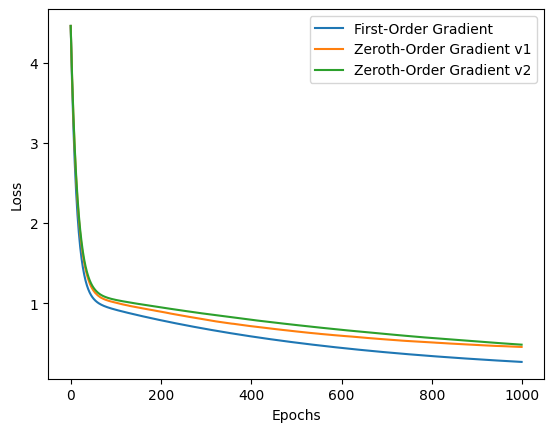

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Define the neural network structure
input_size = 100  # Number of input features
hidden_size = 33  # Number of neurons in the hidden layer
output_size = 1  # Number of output neurons
learning_rate = 0.001
num_samples = 10  # Number of samples for Gaussian smoothing
sigma = 0.1  # Standard deviation for Gaussian noise

# Initialize weights and biases
W1_std = np.random.randn(input_size, hidden_size)
b1_std = np.zeros((1, hidden_size))
W2_std = np.random.randn(hidden_size, output_size)
b2_std = np.zeros((1, output_size))

W1_zo = W1_std.copy()
b1_zo = b1_std.copy()
W2_zo = W2_std.copy()
b2_zo = b2_std.copy()

W1_zo_v2 = W1_std.copy()
b1_zo_v2 = b1_std.copy()
W2_zo_v2 = W2_std.copy()
b2_zo_v2 = b2_std.copy()


# Activation functions and their derivatives
def activation_layer(x, activation_type):
    if activation_type == "tanh":
        return np.tanh(x)
    elif activation_type == "sigmoid":
        return 1 / (1 + np.exp(-x))
    elif activation_type == "softplus":
        return np.log(1 + np.exp(x))
    else:
        raise ValueError(f"Unsupported activation type: {activation_type}")

def activation_layer_derivative(x, activation_type):
    if activation_type == "tanh":
        return 1 - np.tanh(x)**2
    elif activation_type == "sigmoid":
        sig = 1 / (1 + np.exp(-x))
        return sig * (1 - sig)
    elif activation_type == "softplus":
        return 1 / (1 + np.exp(-x))
    else:
        raise ValueError(f"Unsupported activation type: {activation_type}")

# Loss function (Mean Squared Error) and its derivative
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_loss_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_true.size

# Forward pass
def forward(X, W1, b1, W2, b2, activation_type):
    # print(X.shape) #b,10
    # print(W1.shape) #10,20
    Z1 = np.dot(X, W1) + b1
    A1 = activation_layer(Z1, activation_type)
    # print(A1.shape) #b,20
    Z2 = np.dot(A1, W2) + b2
    A2 = Z2  # No activation function in the output layer for regression
    return A2, Z1, A1

def zeroth_order_gradient_estimation_v1(X, y, y_pred, param, param_name, activation_type):
    grad_est = np.zeros_like(param)
    est_partial = 0

    for _ in range(num_samples):
        noise = np.random.normal(0, sigma, param.shape)
        param_plus = param + noise
        param_minus = param

        if param_name == "W1":
            y_pred_plus, _, A1_plus = forward(X, param_plus, b1_zo, W2_zo, b2_zo, activation_type)
            y_pred_minus, _, A1_minus = forward(X, param_minus, b1_zo, W2_zo, b2_zo, activation_type)
        elif param_name == "b1":
            y_pred_plus, _, A1_plus = forward(X, W1_zo, param_plus, W2_zo, b2_zo, activation_type)
            y_pred_minus, _, A1_minus = forward(X, W1_zo, param_minus, W2_zo, b2_zo, activation_type)

        est_partial += np.einsum("ij,mn->ijmn", (A1_plus - A1_minus) / (2 * sigma), noise)

    est_partial /= num_samples

    broadcasted_array = np.broadcast_to(W2_zo.T, (13, hidden_size))

    coef = 2* (y_pred_minus - y).reshape(-1)
    #print(coef.shape)   # 13
    #print(broadcasted_array.shape)  # 13,hidden_size
    pgrad = np.einsum("m,mn->mn", coef, broadcasted_array)
    #print(pgrad.shape) #13,20
    #print(est_partial.shape)  #  13, hidden_size, 10, hidden_size
    grad_est = np.einsum("ij,ijmn->mn", broadcasted_array, est_partial)
    #print(grad_est.shape)
    #raise
    return grad_est

def zeroth_order_gradient_estimation_v2(X, y, y_pred, param, param_name, activation_type):
    grad_est = np.zeros_like(param)

    for _ in range(num_samples):
        noise = np.random.normal(0, sigma, param.shape)
        param_plus = param + noise
        param_minus = param

        if param_name == "W1":
            y_pred_plus, _, _ = forward(X, param_plus, b1_zo, W2_zo, b2_zo, activation_type)
            y_pred_minus, _, _ = forward(X, param_minus, b1_zo, W2_zo, b2_zo, activation_type)
        elif param_name == "b1":
            y_pred_plus, _, _ = forward(X, W1_zo, param_plus, W2_zo, b2_zo, activation_type)
            y_pred_minus, _, _ = forward(X, W1_zo, param_minus, W2_zo, b2_zo, activation_type)

        loss_plus = mse_loss(y, y_pred_plus)
        loss_minus = mse_loss(y, y_pred_minus)

        grad_est += (loss_plus - loss_minus) / (2 * sigma) * noise

    grad_est /= num_samples

    return grad_est


# Backward pass with standard gradient for the first method
def backward_standard(X, y, y_pred, Z1, A1, Z2, A2, activation_type):
    global W1_std, b1_std, W2_std, b2_std
    d_loss_y_pred = mse_loss_derivative(y, y_pred)

    d_loss_Z2 = d_loss_y_pred
    d_loss_W2 = np.dot(A1.T, d_loss_Z2)
    d_loss_b2 = np.sum(d_loss_Z2, axis=0, keepdims=True)

    d_loss_A1 = np.dot(d_loss_Z2, W2_std.T)
    d_loss_Z1 = d_loss_A1 * activation_layer_derivative(Z1, activation_type)
    d_loss_W1 = np.dot(X.T, d_loss_Z1)
    d_loss_b1 = np.sum(d_loss_Z1, axis=0, keepdims=True)

    # Update weights and biases
    W1_std -= learning_rate * d_loss_W1
    b1_std -= learning_rate * d_loss_b1
    W2_std -= learning_rate * d_loss_W2
    b2_std -= learning_rate * d_loss_b2

# Backward pass with zeroth-order gradient for the first layer for the second method (v1)
def backward_zeroth_order_v1(X, y, y_pred, Z1, A1, Z2, A2, activation_type):
    global W1_zo, b1_zo, W2_zo, b2_zo
    d_loss_y_pred = mse_loss_derivative(y, y_pred)

    d_loss_Z2 = d_loss_y_pred
    d_loss_W2 = np.dot(A1.T, d_loss_Z2)
    d_loss_b2 = np.sum(d_loss_Z2, axis=0, keepdims=True)

    d_loss_A1 = np.dot(d_loss_Z2, W2_zo.T)
    d_loss_Z1 = d_loss_A1 * activation_layer_derivative(Z1, activation_type)

    # Zeroth-order gradient estimation for W1 and b1 using v1
    d_loss_W1 = zeroth_order_gradient_estimation_v1(X, y, y_pred, W1_zo, "W1", activation_type)
    d_loss_b1 = zeroth_order_gradient_estimation_v1(X, y, y_pred, b1_zo, "b1", activation_type)

    # Update weights and biases
    W1_zo -= learning_rate * d_loss_W1
    b1_zo -= learning_rate * d_loss_b1
    W2_zo -= learning_rate * d_loss_W2
    b2_zo -= learning_rate * d_loss_b2

# Backward pass with zeroth-order gradient for the first layer for the second method (v2)
def backward_zeroth_order_v2(X, y, y_pred, Z1, A1, Z2, A2, activation_type):
    global W1_zo_v2, b1_zo_v2, W2_zo_v2, b2_zo_v2
    d_loss_y_pred = mse_loss_derivative(y, y_pred)

    d_loss_Z2 = d_loss_y_pred
    d_loss_W2 = np.dot(A1.T, d_loss_Z2)
    d_loss_b2 = np.sum(d_loss_Z2, axis=0, keepdims=True)

    d_loss_A1 = np.dot(d_loss_Z2, W2_zo_v2.T)
    d_loss_Z1 = d_loss_A1 * activation_layer_derivative(Z1, activation_type)

    # Zeroth-order gradient estimation for W1 and b1 using v2
    d_loss_W1 = zeroth_order_gradient_estimation_v2(X, y, y_pred, W1_zo_v2, "W1", activation_type)
    d_loss_b1 = zeroth_order_gradient_estimation_v2(X, y, y_pred, b1_zo_v2, "b1", activation_type)

    # Update weights and biases
    W1_zo_v2 -= learning_rate * d_loss_W1
    b1_zo_v2 -= learning_rate * d_loss_b1
    W2_zo_v2 -= learning_rate * d_loss_W2
    b2_zo_v2 -= learning_rate * d_loss_b2

# Training the network
def train(X, y, epochs=1000, activation_type="tanh"):
    loss_std = []
    loss_zo_v1 = []
    loss_zo_v2 = []

    for epoch in range(epochs):
        y_pred_std, Z1_std, A1_std = forward(X, W1_std, b1_std, W2_std, b2_std, activation_type)
        loss_std.append(mse_loss(y, y_pred_std))
        backward_standard(X, y, y_pred_std, Z1_std, A1_std, Z1_std, y_pred_std, activation_type)

        y_pred_zo_v1, Z1_zo, A1_zo = forward(X, W1_zo, b1_zo, W2_zo, b2_zo, activation_type)
        loss_zo_v1.append(mse_loss(y, y_pred_zo_v1))
        backward_zeroth_order_v1(X, y, y_pred_zo_v1, Z1_zo, A1_zo, Z1_zo, y_pred_zo_v1, activation_type)

        y_pred_zo_v2, Z1_zo_v2, A1_zo_v2 = forward(X, W1_zo_v2, b1_zo_v2, W2_zo_v2, b2_zo_v2, activation_type)
        loss_zo_v2.append(mse_loss(y, y_pred_zo_v2))
        backward_zeroth_order_v2(X, y, y_pred_zo_v2, Z1_zo_v2, A1_zo_v2, Z1_zo_v2, y_pred_zo_v2, activation_type)

        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss (Standard Gradient): {loss_std[-1]}, Loss (Zeroth-Order Gradient v1): {loss_zo_v1[-1]}, Loss (Zeroth-Order Gradient v2): {loss_zo_v2[-1]}')

    return loss_std, loss_zo_v1, loss_zo_v2

X = np.random.rand(13, input_size)
y = np.random.rand(13, output_size)

loss_std, loss_zo_v1, loss_zo_v2 = train(X, y, epochs=1000, activation_type="sigmoid")

# Plot the results
plt.plot(loss_std, label='First-Order Gradient')
plt.plot(loss_zo_v1, label='Zeroth-Order Gradient v1')
plt.plot(loss_zo_v2, label='Zeroth-Order Gradient v2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# plt.ylim(0.1,1)
plt.legend()
plt.show()



Epoch 0, Loss (Standard Gradient): 18.299116570569726, Loss (Zeroth-Order Gradient v1): 18.299116570569726, Loss (Zeroth-Order Gradient v2): 18.299116570569726
Epoch 100, Loss (Standard Gradient): 1.1795586315822215, Loss (Zeroth-Order Gradient v1): 1.1859755661062266, Loss (Zeroth-Order Gradient v2): 1.2137496509152557
Epoch 200, Loss (Standard Gradient): 0.9182558850239586, Loss (Zeroth-Order Gradient v1): 0.8460837570731037, Loss (Zeroth-Order Gradient v2): 1.0288178822118452
Epoch 300, Loss (Standard Gradient): 0.7033084372083922, Loss (Zeroth-Order Gradient v1): 0.7463567294480312, Loss (Zeroth-Order Gradient v2): 0.9186050986021039
Epoch 400, Loss (Standard Gradient): 0.5322690587658664, Loss (Zeroth-Order Gradient v1): 0.6812632187856789, Loss (Zeroth-Order Gradient v2): 0.8190029526209293
Epoch 500, Loss (Standard Gradient): 0.40337354839519407, Loss (Zeroth-Order Gradient v1): 0.6316918305779271, Loss (Zeroth-Order Gradient v2): 0.7302242832018829
Epoch 600, Loss (Standard Gra

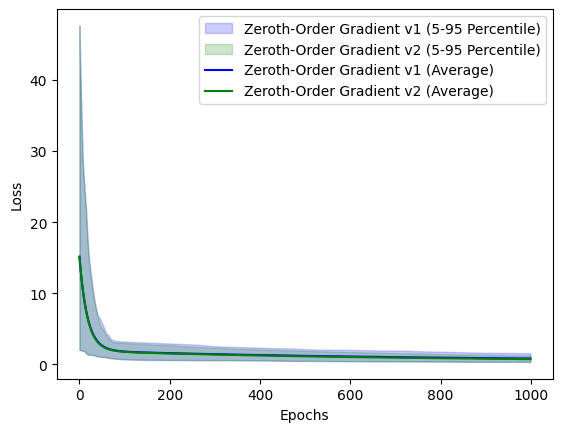

In [ ]:
# Repeat the training process 100 times and collect losses
repetitions = 100
epochs = 1000
all_loss_zo_v1 = []
all_loss_zo_v2 = []
for _ in range(repetitions):
    W1_std = np.random.randn(input_size, hidden_size)
    b1_std = np.zeros((1, hidden_size))
    W2_std = np.random.randn(hidden_size, output_size)
    b2_std = np.zeros((1, output_size))

    W1_zo = W1_std.copy()
    b1_zo = b1_std.copy()
    W2_zo = W2_std.copy()
    b2_zo = b2_std.copy()

    W1_zo_v2 = W1_std.copy()
    b1_zo_v2 = b1_std.copy()
    W2_zo_v2 = W2_std.copy()
    b2_zo_v2 = b2_std.copy()
    _, loss_zo_v1, loss_zo_v2 = train(X, y, epochs=epochs, activation_type="sigmoid")

    all_loss_zo_v1.append(loss_zo_v1)
    all_loss_zo_v2.append(loss_zo_v2)

# Calculate percentiles and averages
loss_zo_v1_array = np.array(all_loss_zo_v1)
loss_zo_v2_array = np.array(all_loss_zo_v2)

percentiles_zo_v1 = np.percentile(loss_zo_v1_array, [5, 95], axis=0)
percentiles_zo_v2 = np.percentile(loss_zo_v2_array, [5, 95], axis=0)

average_zo_v1 = np.mean(loss_zo_v1_array, axis=0)
average_zo_v2 = np.mean(loss_zo_v2_array, axis=0)

# Plot the results with percentiles and averages
epochs_range = np.arange(epochs)

plt.fill_between(epochs_range, percentiles_zo_v1[0], percentiles_zo_v1[1], color='blue', alpha=0.2, label='Zeroth-Order Gradient v1 (5-95 Percentile)')
plt.fill_between(epochs_range, percentiles_zo_v2[0], percentiles_zo_v2[1], color='green', alpha=0.2, label='Zeroth-Order Gradient v2 (5-95 Percentile)')

plt.plot(epochs_range, average_zo_v1, color='blue', label='Zeroth-Order Gradient v1 (Average)')
plt.plot(epochs_range, average_zo_v2, color='green', label='Zeroth-Order Gradient v2 (Average)')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

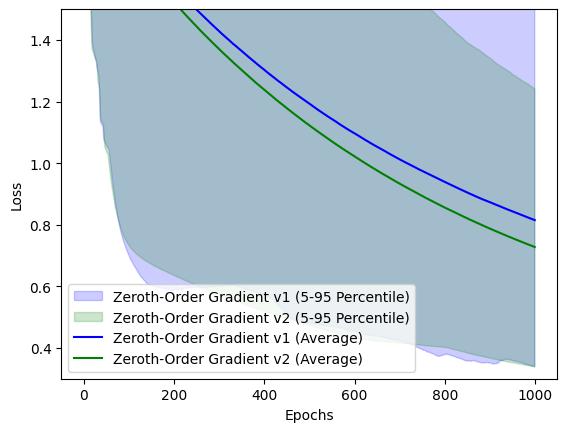

In [ ]:

# Plot the results with percentiles and averages
epochs_range = np.arange(epochs)

plt.fill_between(epochs_range, percentiles_zo_v1[0], percentiles_zo_v1[1], color='blue', alpha=0.2, label='Zeroth-Order Gradient v1 (5-95 Percentile)')
plt.fill_between(epochs_range, percentiles_zo_v2[0], percentiles_zo_v2[1], color='green', alpha=0.2, label='Zeroth-Order Gradient v2 (5-95 Percentile)')

plt.plot(epochs_range, average_zo_v1, color='blue', label='Zeroth-Order Gradient v1 (Average)')
plt.plot(epochs_range, average_zo_v2, color='green', label='Zeroth-Order Gradient v2 (Average)')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0.3,1.5)
plt.legend()
plt.show()

In [ ]:
import pickle
with open('lists.pkl', 'wb') as file:
    pickle.dump((all_loss_zo_v1, all_loss_zo_v2), file)

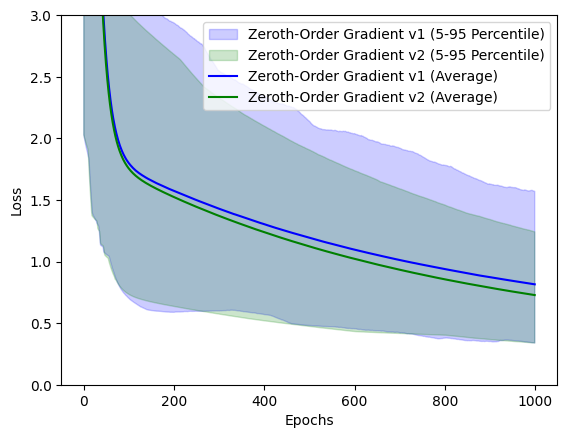

In [ ]:

with open('lists.pkl', 'rb') as file:
  all_loss_zo_v1, all_loss_zo_v2 = pickle.load(file)

# Calculate percentiles and averages
loss_zo_v1_array = np.array(all_loss_zo_v1)
loss_zo_v2_array = np.array(all_loss_zo_v2)

percentiles_zo_v1 = np.percentile(loss_zo_v1_array, [5, 95], axis=0)
percentiles_zo_v2 = np.percentile(loss_zo_v2_array, [5, 95], axis=0)

average_zo_v1 = np.mean(loss_zo_v1_array, axis=0)
average_zo_v2 = np.mean(loss_zo_v2_array, axis=0)

# Plot the results with percentiles and averages
epochs_range = np.arange(epochs)

plt.fill_between(epochs_range, percentiles_zo_v1[0], percentiles_zo_v1[1], color='blue', alpha=0.2, label='Zeroth-Order Gradient v1 (5-95 Percentile)')
plt.fill_between(epochs_range, percentiles_zo_v2[0], percentiles_zo_v2[1], color='green', alpha=0.2, label='Zeroth-Order Gradient v2 (5-95 Percentile)')

plt.plot(epochs_range, average_zo_v1, color='blue', label='Zeroth-Order Gradient v1 (Average)')
plt.plot(epochs_range, average_zo_v2, color='green', label='Zeroth-Order Gradient v2 (Average)')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 3)
plt.legend()
plt.show()